## Evaluation Notebook

### 0 - Important Imports

In [1]:
import torch
from torch import nn
import torch.nn.functional as F
from torch.utils import data

import numpy as np

import os
import sys

import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from LoadRealRunningJumping import *
from LoadSyntheticRunningJumping import *

/usr/local/lib/python3.10/dist-packages/_distutils_hack/__init__.py:55: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(


### 1 - Load Data

In [2]:
data_path = os.path.abspath('/workspaces/container-workspace/tts-gan-main/UniMiB-SHAR')
pre_trained_models_path = os.path.abspath('/workspaces/container-workspace/tts-gan-main/pre-trained-models')

data_path, pre_trained_models_path

('/workspaces/container-workspace/tts-gan-main/UniMiB-SHAR',
 '/workspaces/container-workspace/tts-gan-main/pre-trained-models')

In [3]:
original_set = Running_Or_Jumping(incl_xyz_accel = True, 
                               incl_rms_accel = False, 
                               is_normalize = True, 
                               data_mode = 'Train',
                               data_path = data_path)

/workspaces/container-workspace/tts-gan-main/UniMiB-SHAR
data shape is (1200, 3, 1, 150), label shape is (1200, 1)
Jumping label is 1, has 600 samples, Running label is 0, has 600 samples


In [4]:
syn_set = Synthetic_Dataset(Jumping_model_path = pre_trained_models_path + '/JumpingGAN_checkpoint',
                            Running_model_path = pre_trained_models_path + '/RunningGAN_checkpoint',
                            sample_size=600)

Running checkpoint: 2564
Jumping checkpoint: 834


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

(1200, 3, 1, 150)
(1200, 1)


In [5]:
baby_syn_set = Synthetic_Dataset(Jumping_model_path = pre_trained_models_path + '/Without_training_model/Baby_JumpingGAN_checkpoint',
                                 Running_model_path = pre_trained_models_path + '/Without_training_model/Baby_RunningGAN_checkpoint',
                                 sample_size=600)

All epochs are 0
(1200, 3, 1, 150)
(1200, 1)


In [6]:
train_syn_set = Synthetic_Dataset(Jumping_model_path = '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/checkpoint',
                                  Running_model_path = pre_trained_models_path + '/2_training/RunningGAN_checkpoint',
                                  sample_size=600)

#pre_trained_models_path + '/1_training/JumpingGAN_checkpoint'

Running checkpoint: 506
Jumping checkpoint: 834
(1200, 3, 1, 150)
(1200, 1)


In [7]:
original_data_loader = data.DataLoader(original_set, batch_size=1, num_workers=1, shuffle=True)
syn_data_loader = data.DataLoader(syn_set, batch_size=1, num_workers=1, shuffle=True)
baby_data_loader = data.DataLoader(baby_syn_set, batch_size=1, num_workers=1, shuffle=True)
train_data_loader = data.DataLoader(train_syn_set, batch_size=1, num_workers=1, shuffle=True)

In [8]:
def running_jumping_split(dataloader):
    running = []
    jumping = []

    for i, (real_sig, label) in enumerate(dataloader):
        real_sig = real_sig.cpu().detach().numpy()
        sig = real_sig.reshape(real_sig.shape[1], real_sig.shape[3])
        if label[0] == 0:
            running.append(sig)
        elif label[0] == 1:
            jumping.append(sig)
    
    return np.array(jumping), np.array(running)

In [9]:
jumping_ori_data, running_ori_data = running_jumping_split(original_data_loader)
jumping_ori_data.shape, running_ori_data.shape

((600, 3, 150), (600, 3, 150))

In [10]:
jumping_syn_data, running_syn_data = running_jumping_split(syn_data_loader)
jumping_syn_data.shape, running_syn_data.shape

((600, 3, 150), (600, 3, 150))

In [11]:
jumping_baby_data, running_baby_data = running_jumping_split(baby_data_loader)
jumping_baby_data.shape, running_baby_data.shape

((600, 3, 150), (600, 3, 150))

In [12]:
jumping_train_syn_data, running_train_syn_data = running_jumping_split(train_data_loader)
jumping_train_syn_data.shape, running_train_syn_data.shape

((600, 3, 150), (600, 3, 150))

In [13]:
jumping_train_syn_data[0][1]

array([ 0.19625984,  0.77002007, -0.50221086,  0.2815946 , -0.02261366,
       -0.22327119, -0.38405186, -0.6119626 , -0.24220711,  0.1112119 ,
       -0.10149873, -0.04029558,  0.24256444,  0.02395618,  0.21359348,
        0.34481797, -0.9967608 ,  0.39942247,  0.022934  , -0.08390082,
        0.01628876, -0.02261358,  0.7331323 , -0.494359  , -0.17426246,
        0.28559914,  0.2444669 ,  0.19561484, -0.43435434, -0.14958832,
        0.85167736, -0.35358056, -0.54869187,  0.5986747 ,  0.48226407,
       -0.20006841, -0.40896565,  0.0580397 , -0.1278261 , -0.32291943,
        0.07059986,  0.01692382,  0.5021085 ,  0.7187927 , -0.06941401,
       -0.10106634, -1.617211  , -1.3357946 ,  0.57617825,  0.6748141 ,
        0.9663105 ,  2.139164  ,  2.9802752 ,  3.2080631 ,  3.6614625 ,
        2.2766411 ,  2.3676999 ,  1.2467561 , -1.1382989 , -0.90384704,
       -1.1249062 , -1.8592387 , -1.59734   , -0.04351088, -1.2754955 ,
       -0.70242834, -1.5486605 , -1.6415838 , -1.6803579 , -3.15

In [14]:
running_ori_data[0]

array([[ 8.35154431e-01,  5.95060026e-01,  3.08243579e-01,
        -3.76798607e-01, -7.62660540e-01, -7.98980606e-01,
        -4.84314275e-01,  6.42615353e-01,  5.75587094e-01,
         2.59100427e-01,  4.55948987e-01,  5.21185416e-01,
         5.35969967e-01,  5.83487986e-01,  3.25824518e-01,
         3.88507134e-02, -2.83985612e-01, -3.87464285e-01,
        -4.66290883e-02, -1.60722557e-02, -7.29001570e-02,
        -7.40889863e-02, -5.64227289e-01, -3.80563552e-01,
        -5.29547033e-03, -1.27926909e-01, -4.03799797e-01,
        -2.99323506e-01,  5.91433577e-02,  4.60799466e-01,
         6.19790278e-01,  5.04017271e-01,  4.20260473e-01,
         6.88197118e-01,  1.40512110e+00,  1.41053193e+00,
         1.20852103e+00,  8.89647409e-01,  3.78569137e-01,
        -1.41754290e-01, -7.50488228e-01, -1.41551248e+00,
        -2.54858696e+00, -1.77782578e+00, -3.21283444e-01,
         7.59310288e-01,  8.06491969e-01,  4.61212591e-01,
         3.17572386e-01,  4.72286794e-01,  6.70525765e-0

In [15]:
running_syn_data[0]

array([[ 3.3056861e-01,  4.8055530e-01,  7.3923838e-01,  1.4498851e+00,
         1.4097741e+00,  7.3766905e-01, -4.8097050e-01, -1.0187452e+00,
        -4.4723463e-01, -4.5935133e-01, -1.8034885e+00, -9.5909154e-01,
        -7.2179687e-01, -2.2496462e-01,  1.4857861e+00,  6.1944216e-01,
         5.2549459e-02, -5.3063035e-03,  9.8622881e-02,  7.3782867e-01,
         4.6369386e-01,  4.6112813e-02,  1.7207387e-01, -3.9264157e-02,
        -6.5890086e-01, -1.3759907e+00, -1.1391978e+00, -1.8575835e-01,
        -3.4051692e-01, -2.6780275e-01, -4.1637218e-01,  8.6343807e-01,
        -3.3343765e-01,  6.3204437e-01,  4.1903743e-01,  5.6222200e-01,
         9.9333858e-01,  1.0665530e+00,  3.0646622e-01,  4.0993273e-02,
         6.7058992e-01,  4.5007676e-01,  9.8026454e-01, -1.9790685e-01,
        -8.3928710e-01,  1.0393894e+00,  2.4131148e+00,  1.4133265e+00,
        -1.2578574e-01, -1.7220341e-01,  1.2201735e-01,  2.6040554e-01,
         5.7879126e-01,  8.9074665e-01,  8.5953701e-01,  1.11024

In [16]:
#Expected float 32 on the input
running_syn_data = torch.from_numpy(running_syn_data).unsqueeze(dim=2).type(torch.float)
jumping_syn_data = torch.from_numpy(jumping_syn_data).unsqueeze(dim=2).type(torch.float)

running_ori_data = torch.from_numpy(running_ori_data).unsqueeze(dim=2).type(torch.float)
jumping_ori_data = torch.from_numpy(jumping_ori_data).unsqueeze(dim=2).type(torch.float)

running_baby_data = torch.from_numpy(running_baby_data).unsqueeze(dim=2).type(torch.float)
jumping_baby_data = torch.from_numpy(jumping_baby_data).unsqueeze(dim=2).type(torch.float)

running_train_syn_data = torch.from_numpy(running_train_syn_data).unsqueeze(dim=2).type(torch.float)
jumping_train_syn_data = torch.from_numpy(jumping_train_syn_data).unsqueeze(dim=2).type(torch.float)

In [17]:
running_ori_data.shape

torch.Size([600, 3, 1, 150])

Save DATA

In [18]:
import numpy as np
np.save("/workspaces/container-workspace/tts-gan-main/Notebooks/Author_data/runningOriginal", arr = running_ori_data)
np.save("/workspaces/container-workspace/tts-gan-main/Notebooks/Author_data/jumpingOriginal", arr = jumping_ori_data)
np.save("/workspaces/container-workspace/tts-gan-main/Notebooks/Author_data/runningSynthetic", arr = running_syn_data)
np.save("/workspaces/container-workspace/tts-gan-main/Notebooks/Author_data/jumpingSynthetic", arr = jumping_syn_data)

### 1.1 - Sample Data (Jaime)

In [20]:
import gdown

if not os.path.isdir('/workspaces/container-workspace/tts-gan-main/Notebooks/Sample_data'):
    gdown.download_folder(url='https://drive.google.com/drive/folders/19eEZSS9OCh0NWkTj8tVfxAaHv2LgOz_n',
                       output=os.path.abspath('/workspaces/container-workspace/tts-gan-main/Notebooks/Sample_data'))

In [21]:
real_jumping_sample = torch.from_numpy(np.load('./Sample_data/real_jumping_sample.npy'))
real_jumping_sample.shape

torch.Size([600, 150, 3])

In [22]:
real_jumping_sample_data = torch.from_numpy(np.load('./Sample_data/real_jumping_sample.npy')).unsqueeze(dim=2).transpose(1, 3).type(torch.float)
real_running_sample_data = torch.from_numpy(np.load('./Sample_data/real_running_sample.npy')).unsqueeze(dim=2).transpose(1, 3).type(torch.float)
syn_jumping_sample_data = torch.from_numpy(np.load('./Sample_data/syn_jumping_sample.npy')).unsqueeze(dim=2).transpose(1, 3)
syn_running_sample_data = torch.from_numpy(np.load('./Sample_data/syn_running_sample.npy')).unsqueeze(dim=2).transpose(1, 3)

print(real_jumping_sample_data.dtype, real_running_sample_data.dtype, syn_jumping_sample_data.dtype, syn_running_sample_data.dtype)
real_jumping_sample_data.shape, real_running_sample_data.shape, syn_jumping_sample_data.shape, syn_running_sample_data.shape,


torch.float32 torch.float32 torch.float32 torch.float32


(torch.Size([600, 3, 1, 150]),
 torch.Size([600, 3, 1, 150]),
 torch.Size([1000, 3, 1, 150]),
 torch.Size([1000, 3, 1, 150]))

In [23]:
running_train_syn_data.shape

torch.Size([600, 3, 1, 150])

### 1.2 - FFT


In [24]:
import torch.fft as fft

#synthetic authors
running_syn_fft_data = fft.fft(running_syn_data, dim=-1)
jumping_syn_fft_data = fft.fft(jumping_syn_data, dim=-1)

#original
running_ori_fft_data = fft.fft(running_ori_data, dim=-1)
jumping_ori_fft_data = fft.fft(jumping_ori_data, dim=-1)

#random
running_baby_fft_data = fft.fft(running_baby_data, dim=-1)
jumping_baby_fft_data = fft.fft(jumping_baby_data, dim=-1)

#trained
running_train_syn_fft_data = fft.fft(running_train_syn_data, dim=-1)
jumping_train_syn_fft_data = fft.fft(jumping_train_syn_data, dim=-1)

#sample
jumping_syn_fft_sample_data = fft.fft(syn_jumping_sample_data, dim=-1)
running_syn_fft_sample_data = fft.fft(syn_running_sample_data, dim=-1)

In [25]:
running_syn_fft_data.shape

torch.Size([600, 3, 1, 150])

### 2 - Face-of the Data

#### Time Domain

##### running

In [26]:
running_time_domain = [running_ori_data.squeeze(dim=2), running_baby_data.squeeze(dim=2),
        syn_running_sample_data.squeeze(dim=2), running_syn_data.squeeze(dim=2), 
        running_train_syn_data.squeeze(dim=2)]
c= ['steelblue', 'orangered', 'green']
title = ['Real', 'Random', 'Jaime', 'Author', 'Mine']

In [27]:
def compareGraph(array, c, title, r = None):
    if not r:
        r = torch.randint(0,599, size=(1,)).item()
    temp = array
    print(r)
    fig, axs = plt.subplots(1, len(temp), figsize=(35,5))
    #fig.suptitle('Running', fontsize=30)
    fig.subplots_adjust(wspace=0.1, hspace=0.4)
    for j in range(len(temp)):
        for l in range(3):
            axs[j].plot(temp[j][r][l][:], c=c[l])
        axs[j].set_title(title[j], fontsize=20)

10


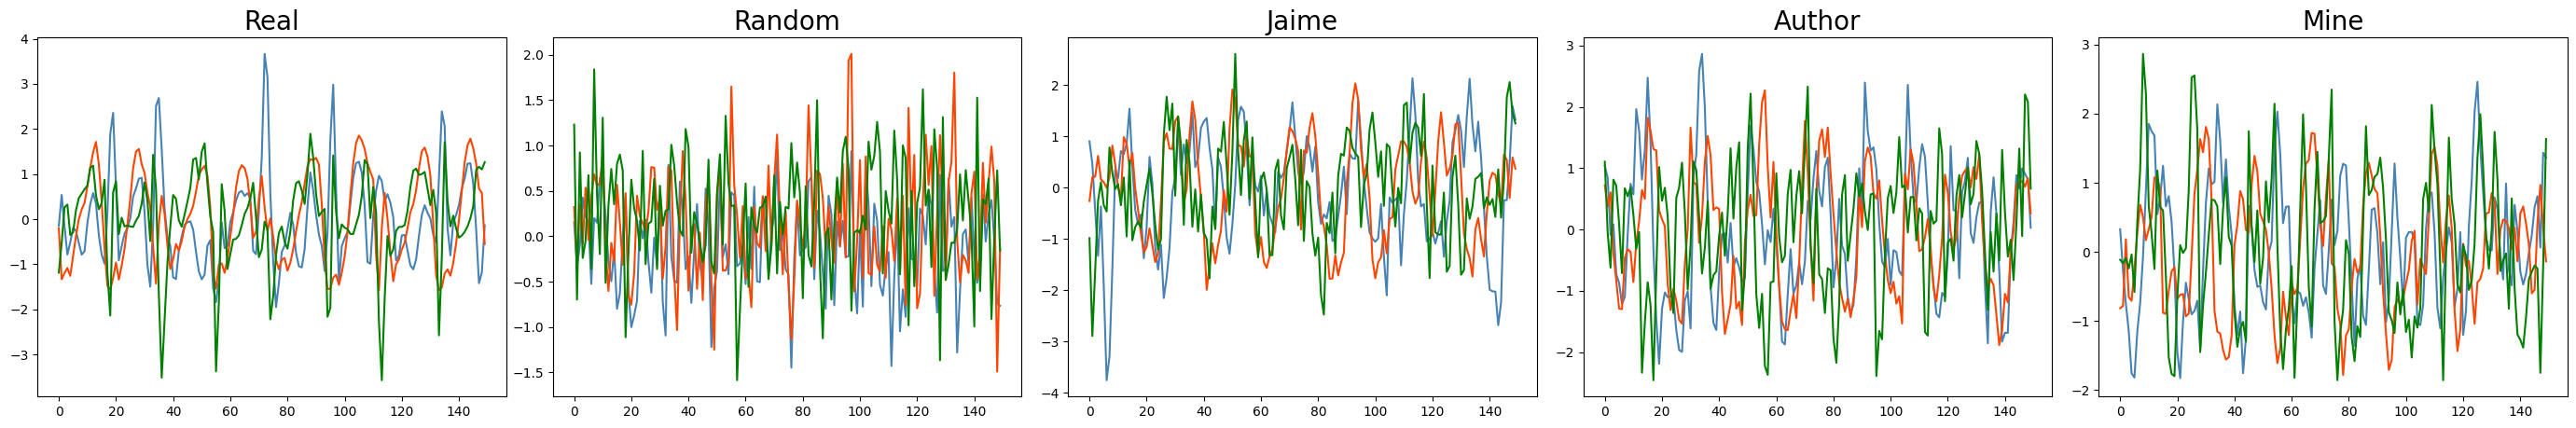

In [28]:
r = 10
compareGraph(running_time_domain, c, title, r=r)

##### jumping

In [107]:
jumping_time_domain = [jumping_ori_data.squeeze(dim=2), jumping_baby_data.squeeze(dim=2),
        syn_jumping_sample_data.squeeze(dim=2), jumping_syn_data.squeeze(dim=2), 
        jumping_train_syn_data.squeeze(dim=2)]

587
1
2
3
4
5
6
7
8
9


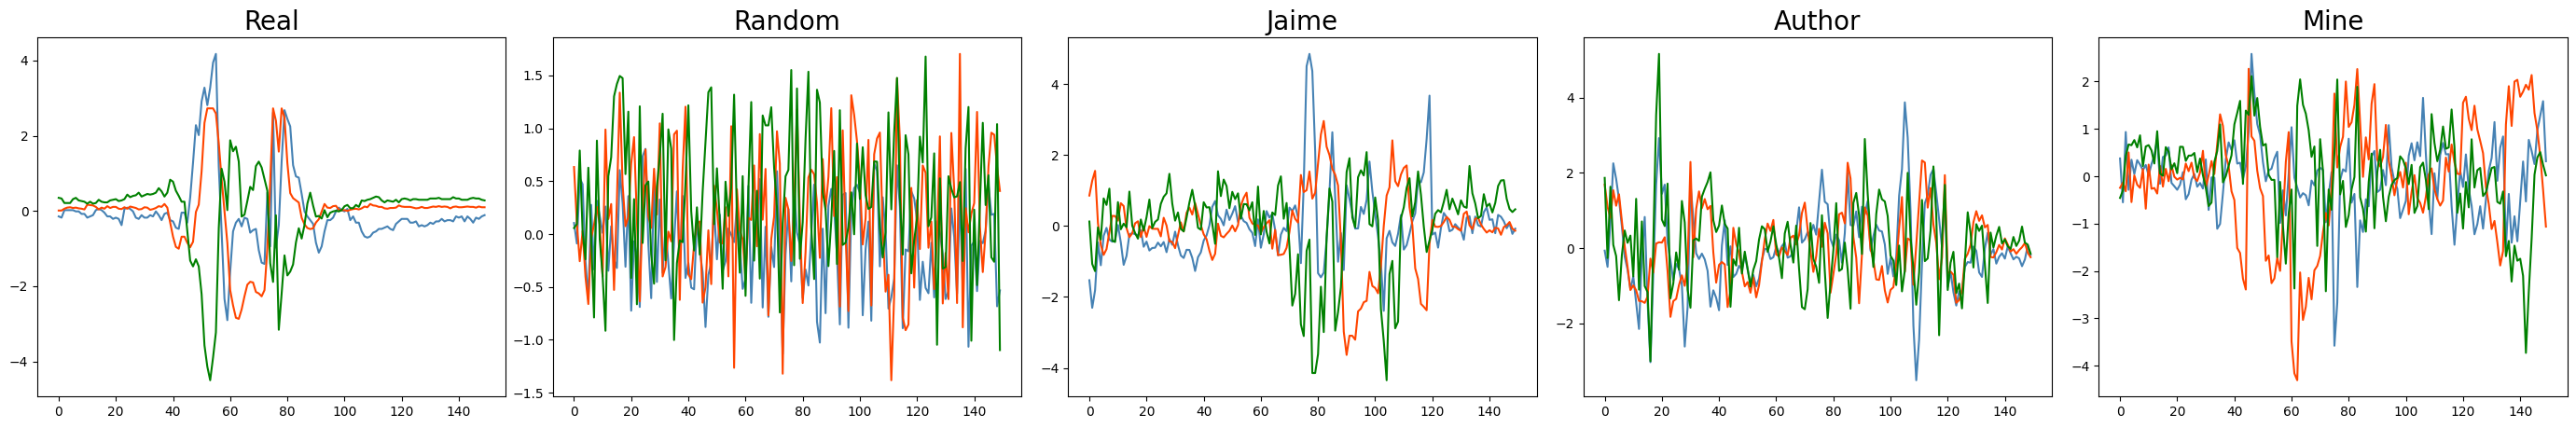

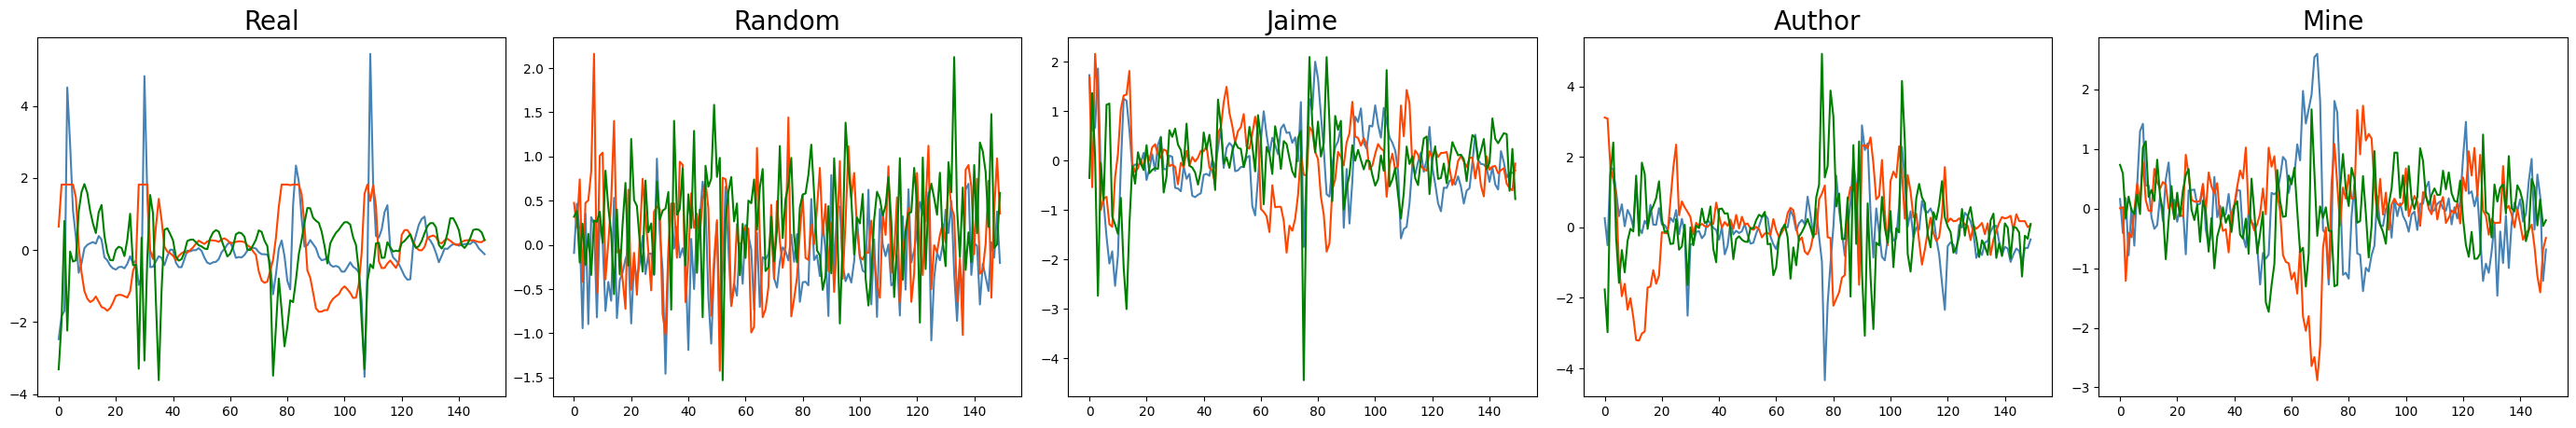

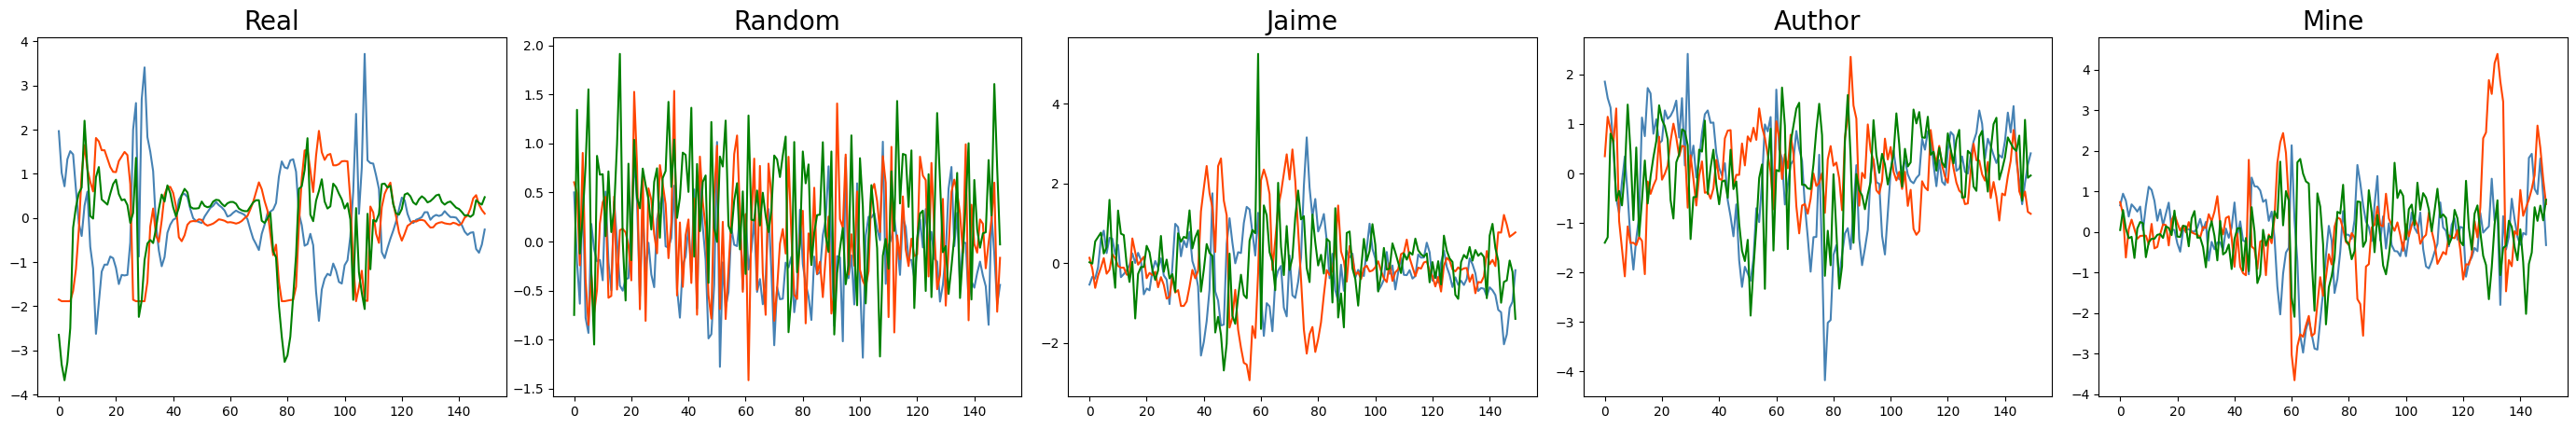

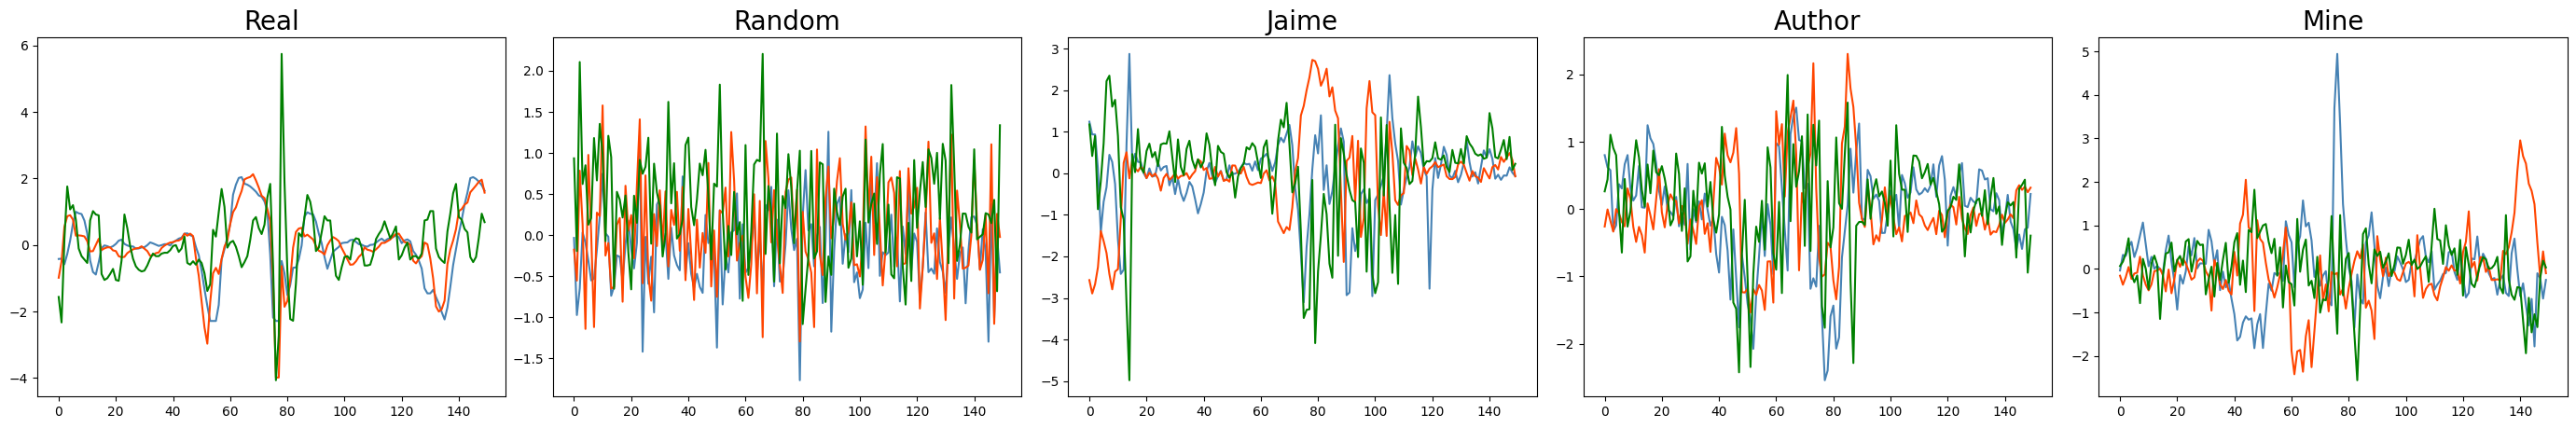

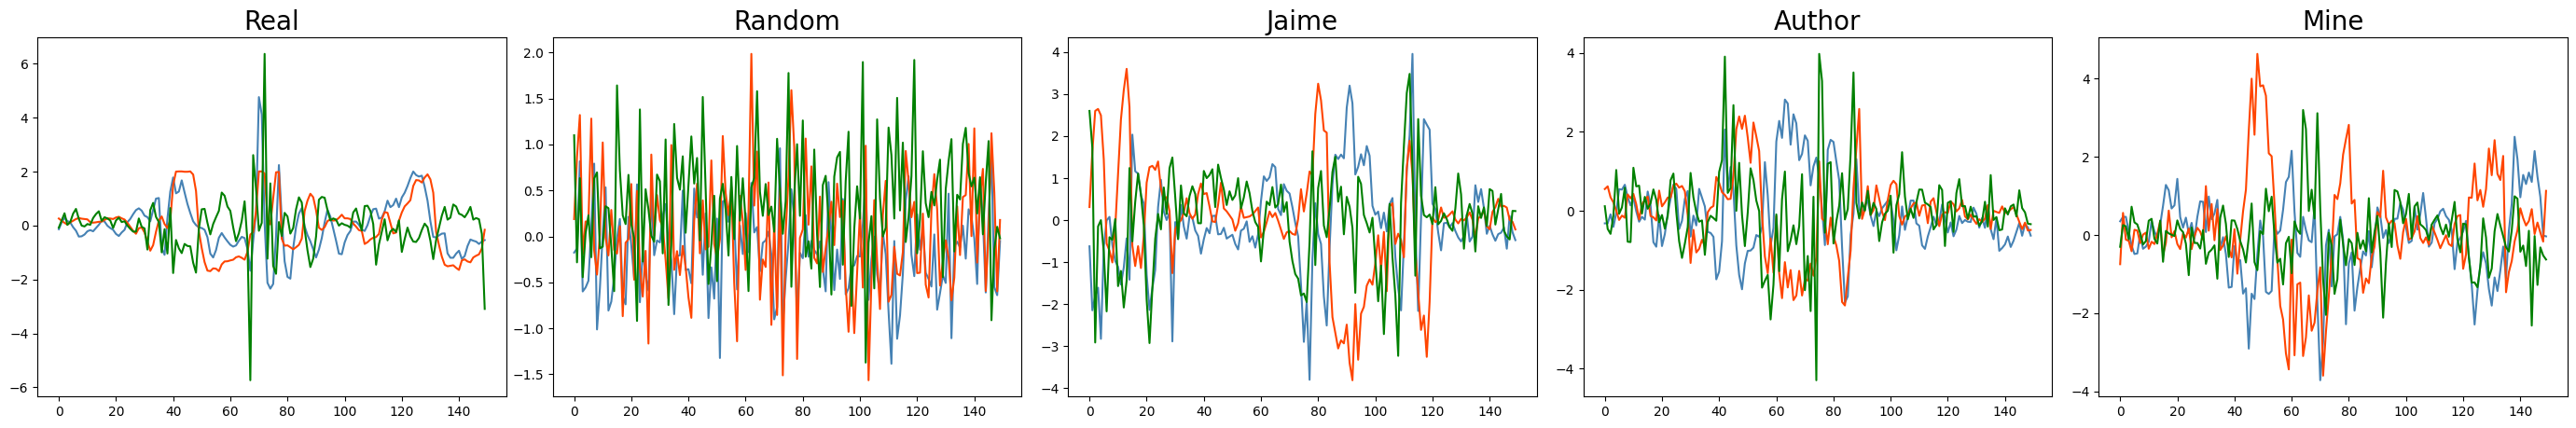

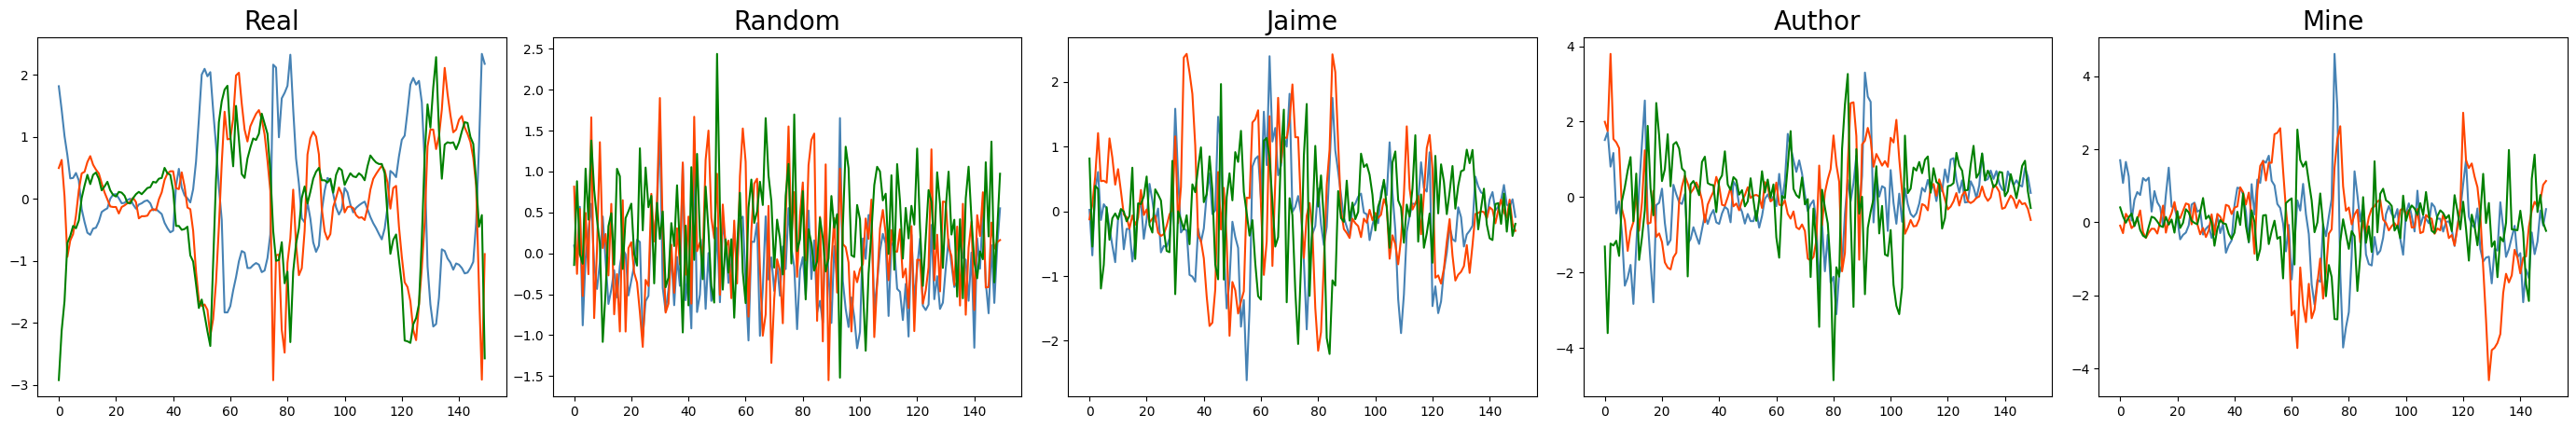

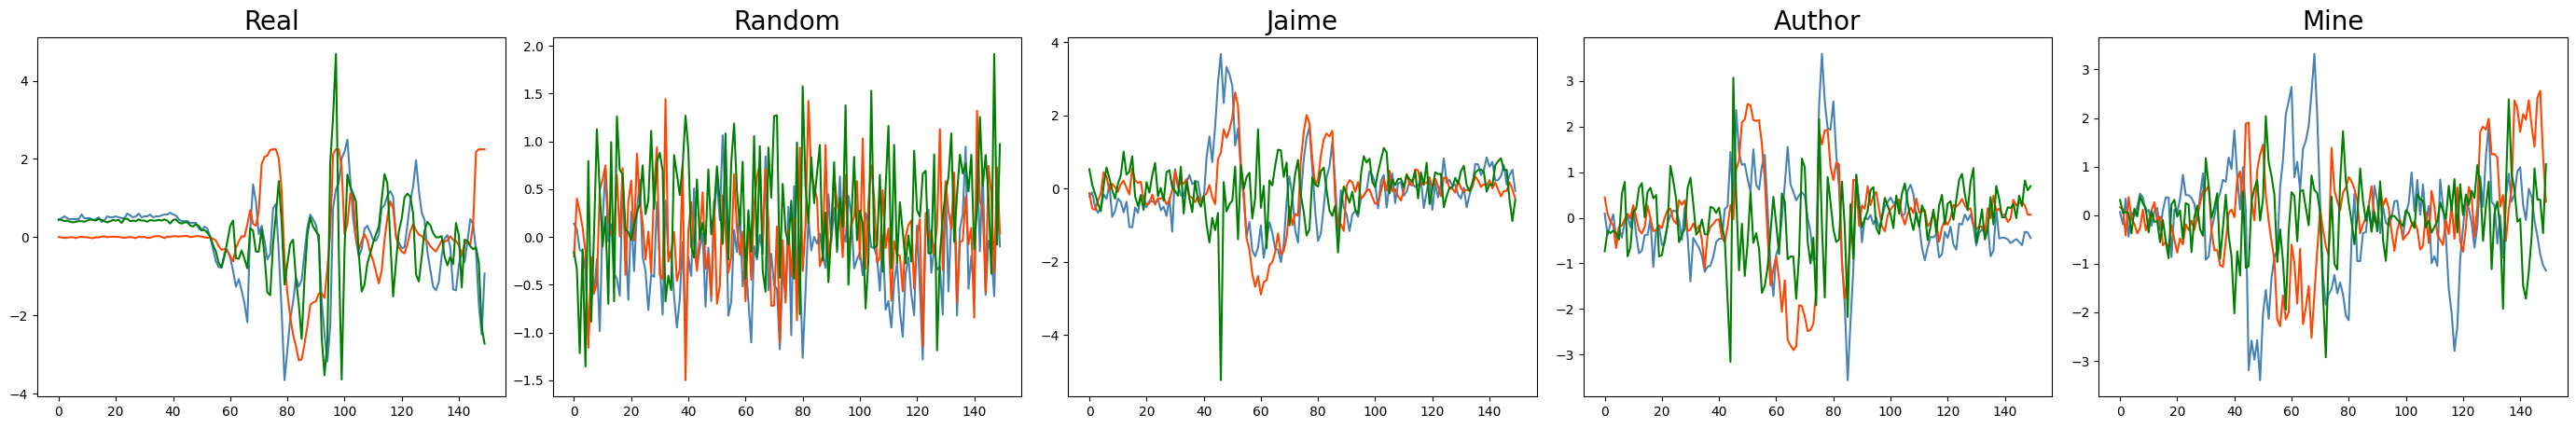

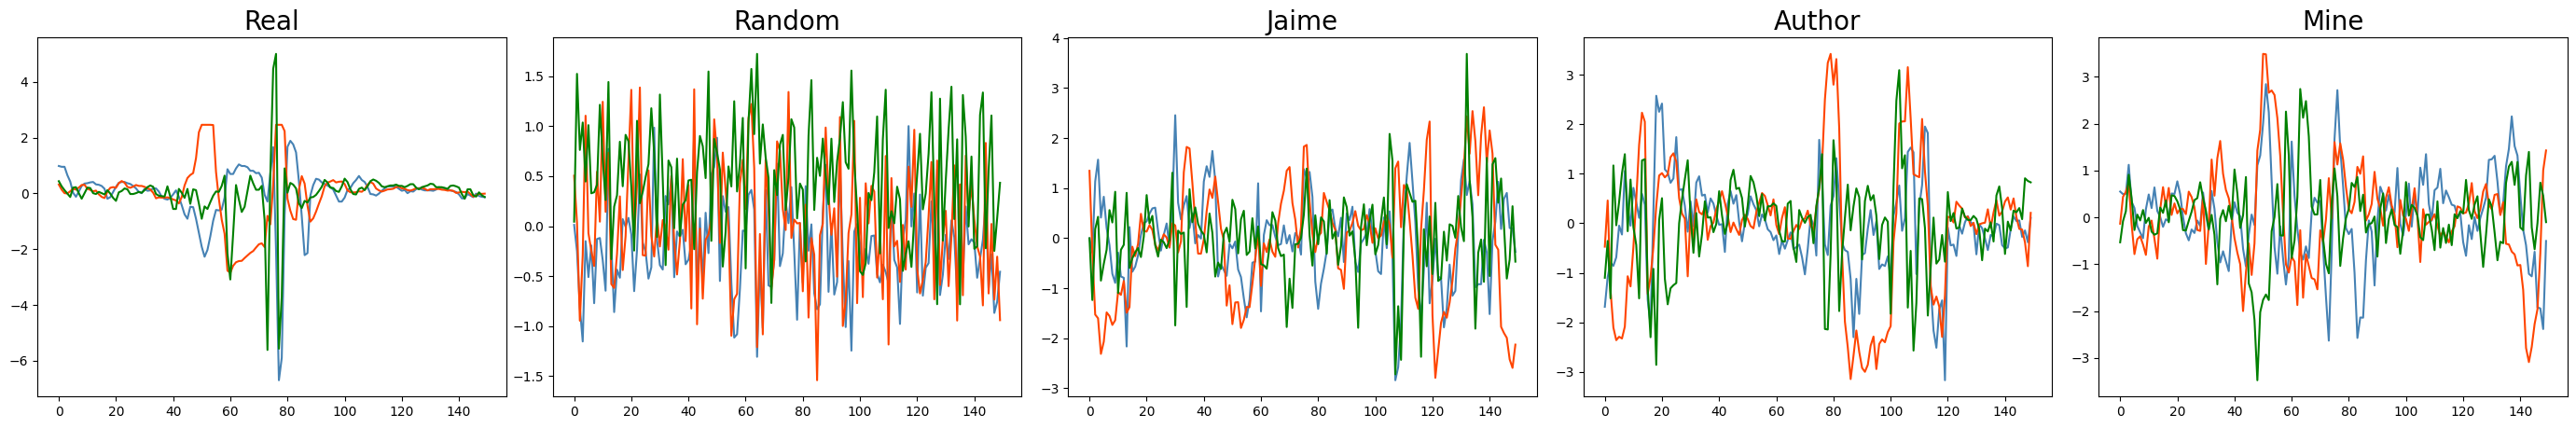

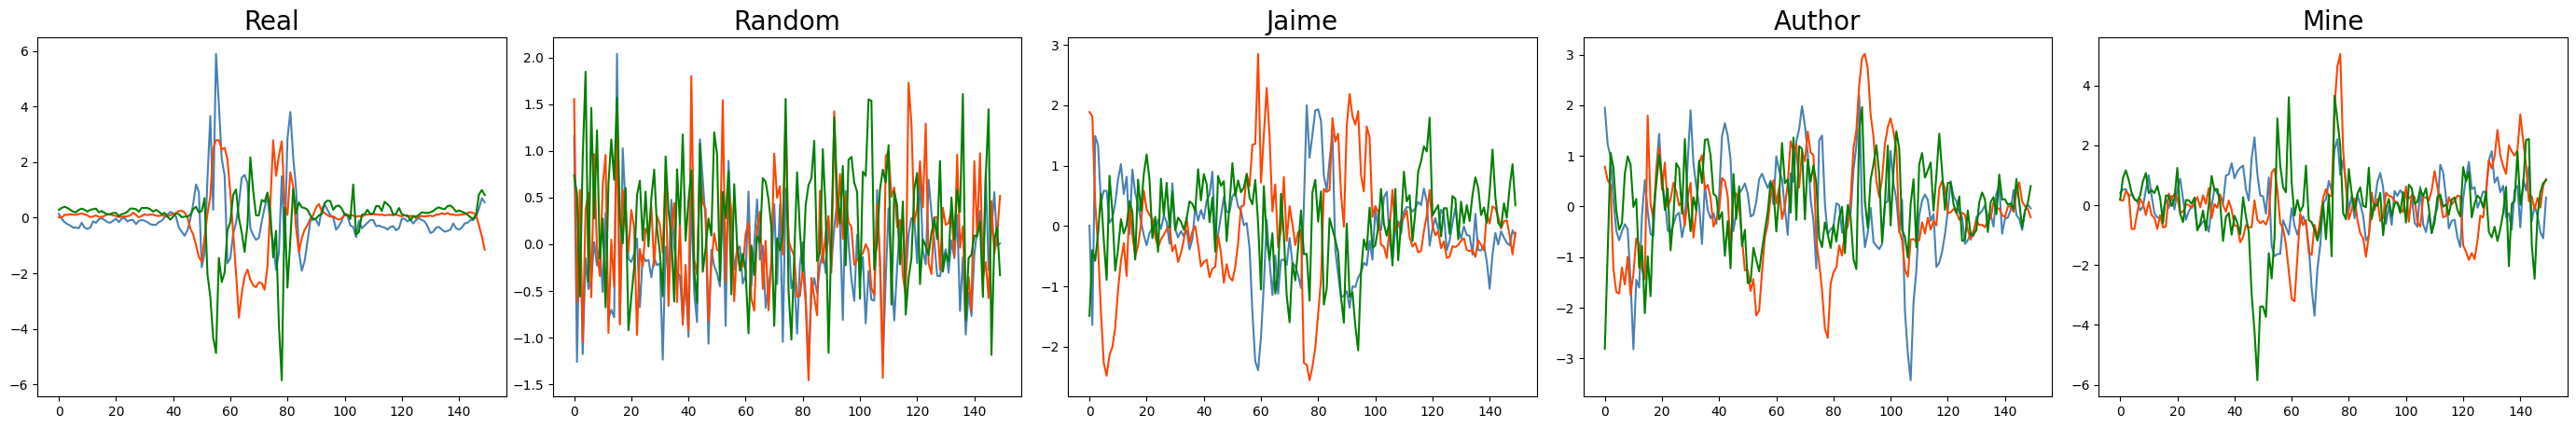

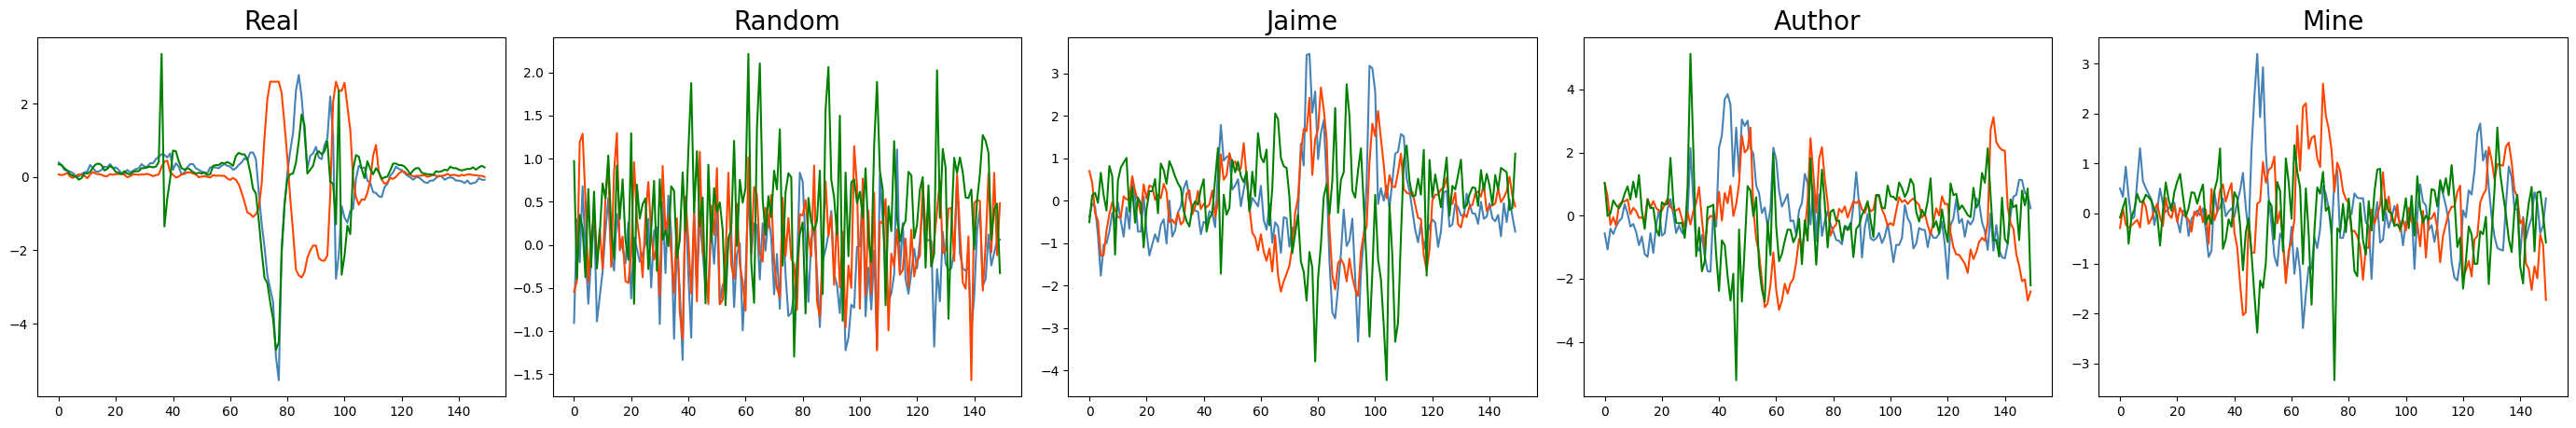

In [110]:
for i in range(10):
    compareGraph(jumping_time_domain, c, title, r=i)

#### Frequency Domain

##### Running

In [31]:
running_frequency_domain = [running_ori_fft_data.squeeze(dim=2), running_baby_fft_data.squeeze(dim=2),
                            running_syn_fft_sample_data.squeeze(dim=2), running_syn_fft_data.squeeze(dim=2), 
                            running_train_syn_fft_data.squeeze(dim=2)]

10


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:1085: ComplexWarning: Casting complex values to real discards the imaginary part
  return self.numpy().astype(dtype, copy=False)


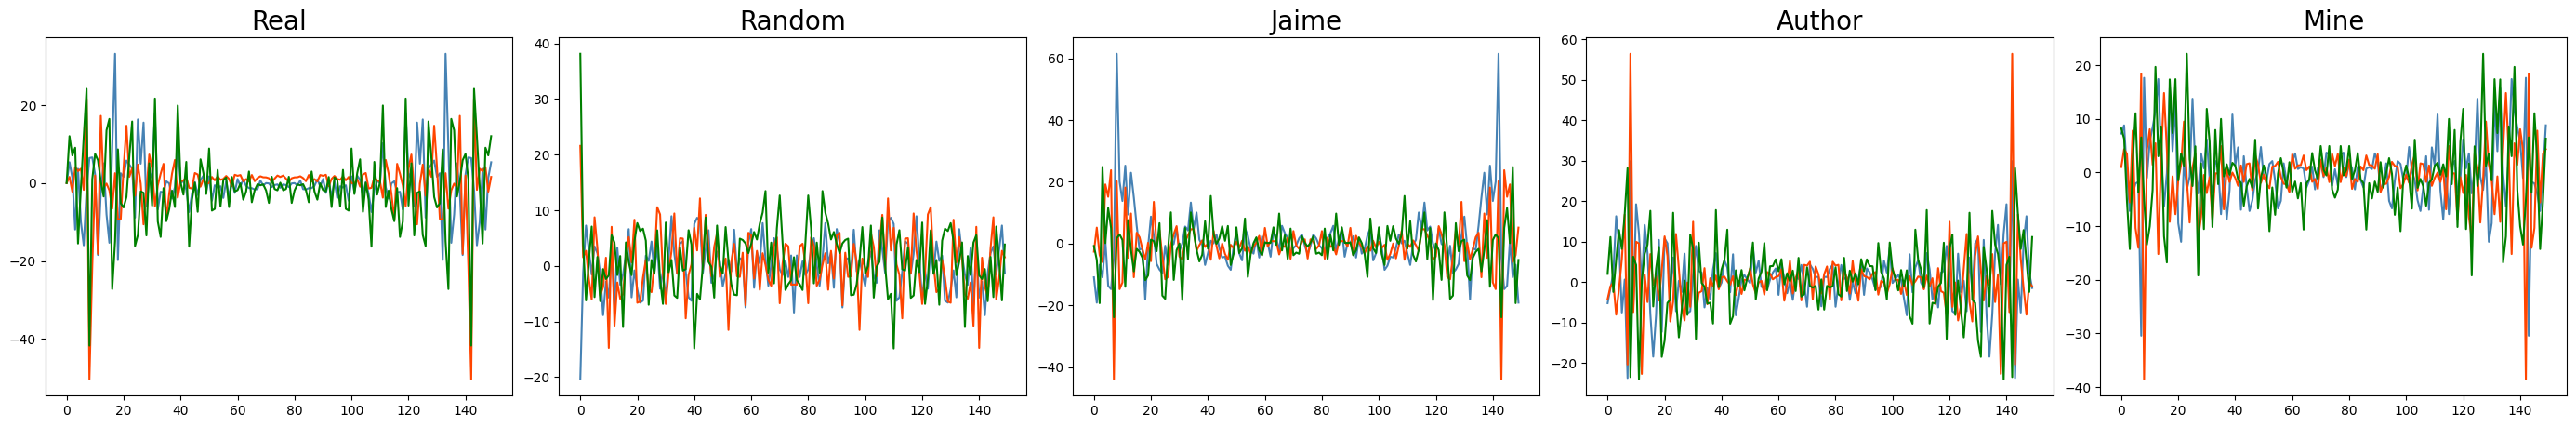

In [32]:
compareGraph(running_frequency_domain, c, title, r=r)

##### Jumping

In [33]:
jumping_frequency_domain = [jumping_ori_fft_data.squeeze(dim=2), jumping_baby_fft_data.squeeze(dim=2),
                            jumping_syn_fft_sample_data.squeeze(dim=2), jumping_syn_fft_data.squeeze(dim=2), 
                            jumping_train_syn_fft_data.squeeze(dim=2)]

10


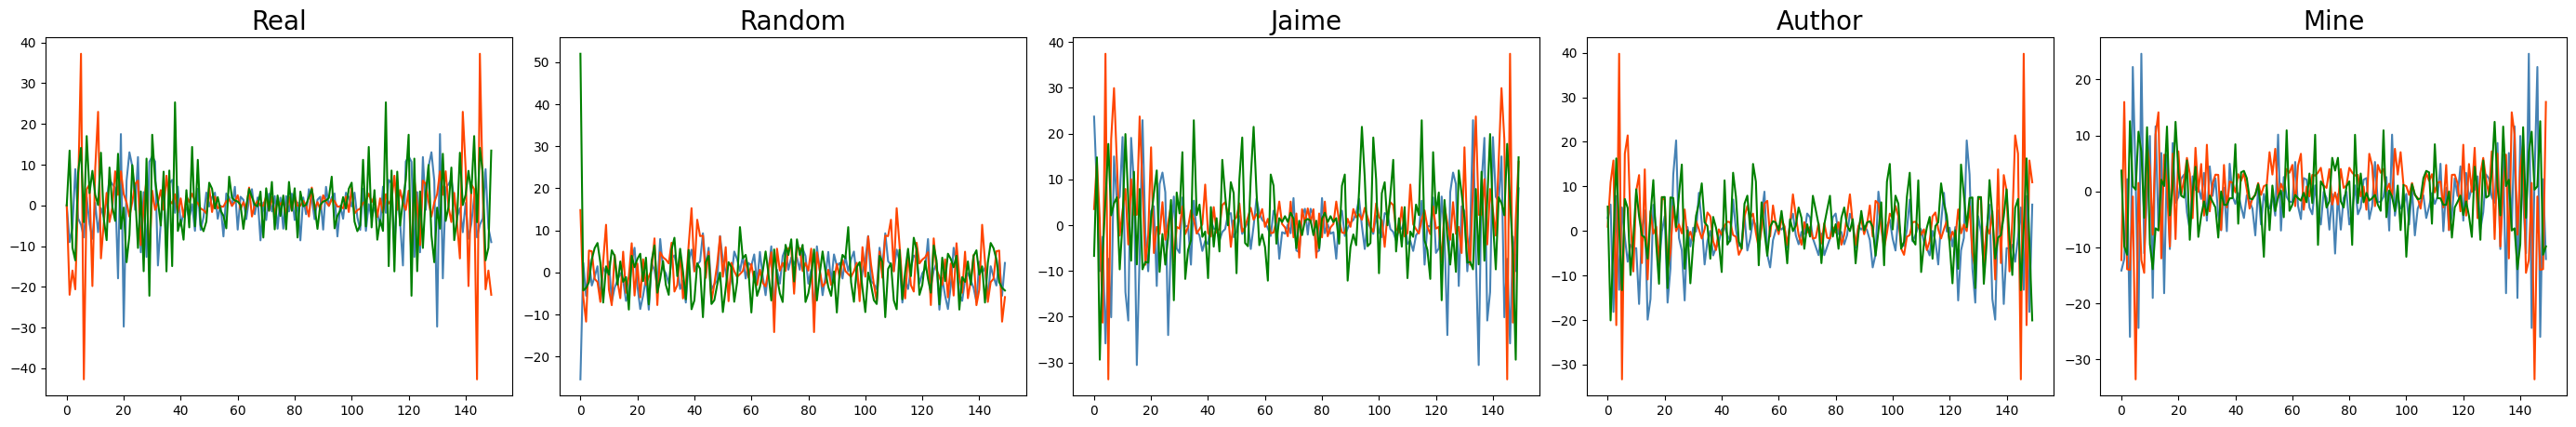

In [34]:
compareGraph(jumping_frequency_domain, c, title, r=r)

### 3 - Feature Extraction


#### Simple Feature Extraction


Fazer o batchmean dos dados
Fazer a média das energias (Feature Manual)


In [35]:
running_syn_data.median(dim=-1)[0].shape, running_syn_data.mean(dim=-1).shape, running_syn_data.std(dim=-1).shape, \
running_syn_data.var(dim=-1).shape, torch.sqrt((running_syn_data**2).mean(dim=-1)).shape,running_syn_data.max(dim=-1)[0].shape, \
running_syn_data.min(dim=-1)[0].shape

(torch.Size([600, 3, 1]),
 torch.Size([600, 3, 1]),
 torch.Size([600, 3, 1]),
 torch.Size([600, 3, 1]),
 torch.Size([600, 3, 1]),
 torch.Size([600, 3, 1]),
 torch.Size([600, 3, 1]))

In [36]:
def rootMeanSquare(data: torch.tensor):
    
    return torch.sqrt((data**2).mean(dim=-1))

In [37]:
def getEnergyFromTensor(data: torch.tensor):
    '''
    gets the energy or s² = x² + y² + z²
    
    parameters:
        input:
            data -> Tensor
        return:
            s = (x² + y² + z²)^(0.5)
    '''
    #print(data.shape)
    x = data[:,0]
    #print(x.shape)
    y = data[:,1]
    #print(y.shape)
    z = data[:,2]
    #print(z.shape)
    s = (x**2 + y**2 + z**2)**0.5
    #print(s.shape)
    return s

In [38]:
test = running_ori_data.squeeze(dim=2)
a = (test**2)

print(f'Data shape: {test.shape}, Data Sum: {test[0][0].sum()}, Data Squared Sum: {a[0][0].sum()}')

#test[0][0], a[0][0]

Data shape: torch.Size([600, 3, 150]), Data Sum: 1.3113021850585938e-06, Data Squared Sum: 150.0


Pode-se perceber que quando temos um vetor de dados originais e elevamos ele ao quadrado, a soma de todos os 150 de cada um dos eixo separadamente sempre será 150

In [39]:
((test**2).mean(dim=-1)).shape, ((test**2).mean(dim=-1))[1], (test**2)[1].sum()

(torch.Size([600, 3]), tensor([1., 1., 1.]), tensor(450.0000))

In [40]:
torch.sqrt((test**2).mean(dim=-1))[0], rootMeanSquare(test)

(tensor([1., 1., 1.]),
 tensor([[1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         ...,
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000]]))

In [41]:
result = getEnergyFromTensor(data = torch.sqrt((running_syn_data**2).mean(dim=-1)))
result[0]

tensor([1.7617])

In [42]:
def simpleFeatureExtractor(data: torch.tensor, squeeze: int = 2, dim: int = -1):
    '''
    A simple feature extractor of several meaningful features from each input
    data sequence. They are the median, mean, standard deviation, variance, root
    mean square, maximum, and minimum values of each input sequence. 

    The tensor is expected to be in shape (600, 3, 1, 150), with 600 of batch, 
    3 channels (x,y,z), height 1 and width 150 (time)

    parameters:
        input:
            data -> The tensor from which we will extract the features
            squeeze -> which dimention we'll squeeze
            dim -> dimention of the time channels (for our purposes is the last one)
    
    '''
    #print(data.shape)
    fmedian = getEnergyFromTensor(data.median(dim=dim)[0])
    fmean = getEnergyFromTensor(data.mean(dim=dim))
    fstd = getEnergyFromTensor(data.std(dim=dim))
    fvar = getEnergyFromTensor(data.var(dim=dim))
    frms = getEnergyFromTensor(rootMeanSquare(data))
    fmax = getEnergyFromTensor(data.max(dim=dim)[0])
    fmin = getEnergyFromTensor(data.min(dim=dim)[0])
    #print(fmin.shape)
    
    return torch.cat((fmedian, fmean, fstd, fvar, frms, fmax, fmin), dim=1)


result1 = simpleFeatureExtractor(running_ori_data, squeeze=2, dim=-1)
result2 = simpleFeatureExtractor(running_syn_data, squeeze=2, dim=-1)
result1[:4], result2[:4]


(tensor([[1.0323e-01, 1.2465e-08, 1.7379e+00, 1.7437e+00, 1.7321e+00, 4.0050e+00,
          5.2907e+00],
         [9.7423e-02, 7.6641e-09, 1.7379e+00, 1.7437e+00, 1.7321e+00, 4.3227e+00,
          5.3795e+00],
         [1.2691e-01, 6.7435e-09, 1.7379e+00, 1.7437e+00, 1.7321e+00, 4.0061e+00,
          5.0288e+00],
         [4.3430e-01, 1.0362e-08, 1.7379e+00, 1.7437e+00, 1.7321e+00, 4.2481e+00,
          4.1690e+00]]),
 tensor([[0.2533, 0.0781, 1.7659, 1.8096, 1.7617, 4.3649, 4.7174],
         [0.1606, 0.0490, 1.5610, 1.4221, 1.5566, 3.7779, 3.3354],
         [0.2087, 0.0599, 1.6781, 1.6408, 1.6736, 5.3728, 3.6065],
         [0.1224, 0.0346, 1.8941, 2.0735, 1.8881, 4.7727, 4.3931]]))

Original feature extraction

In [43]:
running_syn_data.shape, running_baby_data.shape

(torch.Size([600, 3, 1, 150]), torch.Size([600, 3, 1, 150]))

In [44]:
simple_syn_running = simpleFeatureExtractor(running_syn_data)
simple_syn_jumping = simpleFeatureExtractor(jumping_syn_data)
simple_real_running = simpleFeatureExtractor(running_ori_data)
simple_real_jumping = simpleFeatureExtractor(jumping_ori_data)

simple_syn_running.shape, simple_syn_jumping.shape, simple_real_running.shape, simple_real_jumping.shape


(torch.Size([600, 7]),
 torch.Size([600, 7]),
 torch.Size([600, 7]),
 torch.Size([600, 7]))

Sample Feature extraction

In [45]:
simple_syn_running_sample = simpleFeatureExtractor(syn_running_sample_data[:600])
simple_syn_jumping_sample = simpleFeatureExtractor(syn_jumping_sample_data[:600])
simple_real_running_sample = simpleFeatureExtractor(real_running_sample_data)
simple_real_jumping_sample = simpleFeatureExtractor(real_jumping_sample_data)

simple_syn_running_sample.shape, simple_syn_jumping_sample.shape, simple_real_running_sample.shape, simple_real_jumping_sample.shape

(torch.Size([600, 7]),
 torch.Size([600, 7]),
 torch.Size([600, 7]),
 torch.Size([600, 7]))

Trained feature extraction

In [46]:
simple_train_running = simpleFeatureExtractor(running_train_syn_data)
simple_train_jumping = simpleFeatureExtractor(jumping_train_syn_data)

simple_train_running.shape, simple_train_jumping.shape

(torch.Size([600, 7]), torch.Size([600, 7]))

Random feature extraction

In [47]:
simple_baby_running = simpleFeatureExtractor(running_baby_data)
simple_baby_jumping = simpleFeatureExtractor(jumping_baby_data)

simple_baby_running.shape, simple_baby_jumping.shape

(torch.Size([600, 7]), torch.Size([600, 7]))

#### Inception feature extraction

In [48]:
'''
from utils.inception import *

Fextractor = InceptionV3() #Expects float32 as an input

inception_syn_running = Fextractor(running_syn_data)[0]
inception_syn_jumping = Fextractor(jumping_syn_data)[0]
inception_real_running = Fextractor(running_ori_data)[0]
inception_real_jumping = Fextractor(jumping_ori_data)[0]
''';


In [49]:
'''
inception_syn_running.shape, inception_syn_jumping.shape, inception_real_running.shape, inception_real_jumping.shape
''';

#### Median Feature Extraction

In [50]:
running_ori_data.shape

torch.Size([600, 3, 1, 150])

In [51]:
z = running_ori_data.squeeze(dim=2)
z.shape

torch.Size([600, 3, 150])

In [52]:
z = running_ori_data.mean(dim=1).squeeze(dim=1)
z.shape

torch.Size([600, 150])

In [53]:
a = z.median(dim=-1)[0]
z.shape, a.shape

(torch.Size([600, 150]), torch.Size([600]))

In [54]:
def meanFeatureExtractor(data: torch.tensor, d: int = 1, dim: int = -1):
    '''
    A simple feature extractor of several meaningful features from each input
    data sequence. They are the median, mean, standard deviation, variance, root
    mean square, maximum, and minimum values of each input sequence. 

    The tensor is expected to be in shape (600, 3, 1, 150), with 600 of batch, 
    3 channels (x,y,z), height 1 and width 150 (time)

    parameters:
        input:
            data -> The tensor from which we will extract the features
            squeeze -> which dimention we'll squeeze
            dim -> dimention of the time channels (for our purposes is the last one)
    
    '''
    #print(data.shape)

    fmedian = data.median(dim=dim)[0].mean(dim=d)
    #print(f'median shape: {fmedian.shape}')
    fmean = data.mean(dim=dim).mean(dim=d)
    #print(f'mean shape: {fmean.shape}')
    fstd = data.std(dim=dim).mean(dim=d)
    #print(f'STD shape: {fstd.shape}')
    fvar = data.var(dim=dim).mean(dim=d)
    #print(f'Var shape: {fvar.shape}')
    frms = rootMeanSquare(data).mean(dim=d)
    #print(f'RMS shape: {frms.shape}')
    fmax = data.max(dim=dim)[0].mean(dim=d)
    #print(f'max value shape: {fmax.shape}')
    fmin = data.min(dim=dim)[0].mean(dim=d)
    #print(f'min value shape: {fmin.shape}')
    
    temp = torch.cat((fmedian, fmean, fstd, fvar, frms, fmax, fmin), dim=1)
    #print(temp.shape)

    return temp


result1 = meanFeatureExtractor(running_ori_data, d=1, dim=-1)
result1[:4], result1.shape

(tensor([[ 3.5860e-02,  5.2982e-10,  1.0034e+00,  1.0067e+00,  1.0000e+00,
           2.2589e+00, -2.9594e+00],
         [-3.8778e-03,  2.6491e-10,  1.0034e+00,  1.0067e+00,  1.0000e+00,
           2.4626e+00, -2.9527e+00],
         [-1.3362e-02, -3.1789e-09,  1.0034e+00,  1.0067e+00,  1.0000e+00,
           2.2837e+00, -2.7153e+00],
         [ 1.0752e-02,  5.8280e-09,  1.0034e+00,  1.0067e+00,  1.0000e+00,
           2.3829e+00, -2.3863e+00]]),
 torch.Size([600, 7]))

In [55]:
mean_syn_running = meanFeatureExtractor(running_syn_data, d=1, dim=-1)
mean_syn_jumping = meanFeatureExtractor(jumping_syn_data, d=1, dim=-1)
mean_real_running = meanFeatureExtractor(running_ori_data, d=1, dim=-1)
mean_real_jumping = meanFeatureExtractor(jumping_ori_data, d=1, dim=-1)

mean_syn_running.shape, mean_syn_jumping.shape, mean_real_running.shape, mean_real_jumping.shape


(torch.Size([600, 7]),
 torch.Size([600, 7]),
 torch.Size([600, 7]),
 torch.Size([600, 7]))

FA

In [56]:
def FeatureExtractor(data: torch.tensor, dim: int = -1):
    '''
    A simple feature extractor of several meaningful features from each input
    data sequence. They are the median, mean, standard deviation, variance, root
    mean square, maximum, and minimum values of each input sequence. 

    The tensor is expected to be in shape (600, 3, 1, 150), with 600 of batch, 
    3 channels (x,y,z), height 1 and width 150 (time)

    parameters:
        input:
            data -> The tensor from which we will extract the features
            squeeze -> which dimention we'll squeeze
            dim -> dimention of the time channels (for our purposes is the last one)
    
    '''
    #print(data.shape)

    fmedian = data.median(dim=dim)[0]
    #print(f'median shape: {fmedian.shape}')
    fmean = data.mean(dim=dim)
    #print(f'mean shape: {fmean.shape}')
    fstd = data.std(dim=dim)
    #print(f'STD shape: {fstd.shape}')
    fvar = data.var(dim=dim)
    #print(f'Var shape: {fvar.shape}')
    frms = rootMeanSquare(data)
    #print(f'RMS shape: {frms.shape}')
    fmax = data.max(dim=dim)[0]
    #print(f'max value shape: {fmax.shape}')
    fmin = data.min(dim=dim)[0]
    #print(f'min value shape: {fmin.shape}')
    
    temp = torch.cat((fmedian, fmean, fstd, fvar, frms, fmax, fmin), dim=-1)
    #print(temp.shape)

    return temp.mean(dim=0) ##Take mean of a batch 


result1 = FeatureExtractor(running_ori_data, dim=-1)
result1[:4], result1.shape

(tensor([[-3.4579e-02, -4.0730e-11,  1.0034e+00,  1.0067e+00,  1.0000e+00,
           2.6915e+00, -2.5393e+00],
         [-1.9817e-02, -2.6044e-10,  1.0034e+00,  1.0067e+00,  1.0000e+00,
           1.9388e+00, -1.8899e+00],
         [-8.6733e-03, -1.7451e-10,  1.0034e+00,  1.0067e+00,  1.0000e+00,
           2.9975e+00, -3.0624e+00]]),
 torch.Size([3, 7]))

In [57]:
fa_syn_running = FeatureExtractor(running_syn_data)
fa_syn_jumping = FeatureExtractor(jumping_syn_data)
fa_real_running = FeatureExtractor(running_ori_data)
fa_real_jumping = FeatureExtractor(jumping_ori_data)

fa_syn_running.shape, fa_syn_jumping.shape, fa_real_running.shape, fa_real_jumping.shape


(torch.Size([3, 7]),
 torch.Size([3, 7]),
 torch.Size([3, 7]),
 torch.Size([3, 7]))

In [58]:
fa_syn_running_sample = FeatureExtractor(syn_running_sample_data[:600])
fa_syn_jumping_sample = FeatureExtractor(syn_jumping_sample_data[:600])
fa_real_running_sample = FeatureExtractor(real_running_sample_data)
fa_real_jumping_sample = FeatureExtractor(real_jumping_sample_data)

fa_syn_running_sample.shape, fa_syn_jumping_sample.shape, fa_real_running_sample.shape, fa_real_jumping_sample.shape

(torch.Size([3, 7]),
 torch.Size([3, 7]),
 torch.Size([3, 7]),
 torch.Size([3, 7]))

In [59]:
fa_train_running = FeatureExtractor(running_train_syn_data)
fa_train_jumping = FeatureExtractor(jumping_train_syn_data)

fa_train_running.shape, fa_train_jumping.shape

(torch.Size([3, 7]), torch.Size([3, 7]))

In [60]:
fa_baby_running = FeatureExtractor(running_baby_data)
fa_baby_jumping = FeatureExtractor(jumping_baby_data)

fa_baby_running.shape, fa_baby_jumping.shape

(torch.Size([3, 7]), torch.Size([3, 7]))

### 4 - Jensen Shannon Divergence (The clossest to zero the better)

without square root

In [61]:

class JSD(nn.Module): #Doesn't have any logarithm in it 
    def __init__(self):
        super(JSD, self).__init__()
        self.kl = nn.KLDivLoss(reduction='batchmean', log_target=True)

    def forward(self, p: torch.tensor, q: torch.tensor):
        p, q = p.view(-1, p.size(-1)), q.view(-1, q.size(-1))
        m = (0.5 * (p + q))
        return 0.5 * (self.kl(m, p) + self.kl(m, q)) #Missing the square root

jsd = JSD()
jsd(simple_syn_running, simple_real_running)


tensor(60.8829)

with square root

In [62]:

class JSD(nn.Module):
    def __init__(self):
        super(JSD, self).__init__()
        self.kl = nn.KLDivLoss(reduction='batchmean', log_target=True)

    def forward(self, p: torch.tensor, q: torch.tensor):
        p, q = p.view(-1, p.size(-1)), q.view(-1, q.size(-1))
        m = (0.5 * (p + q))
        return (0.5 * (self.kl(m, p) + self.kl(m, q)))**0.5 #Missing the square root

jsd = JSD()
jsd(simple_syn_running, simple_real_running )


tensor(7.8027)

##### Original Code

In [63]:
#Original Code
class JSD(nn.Module):
    def __init__(self):
        super(JSD, self).__init__()
        self.kl = nn.KLDivLoss(reduction='batchmean', log_target=True)

    def forward(self, p: torch.tensor, q: torch.tensor):
        p, q = p.view(-1, p.size(-1)), q.view(-1, q.size(-1))
        m = (0.5 * (p + q)).log()
        return 0.5 * (self.kl(m, p.log()) + self.kl(m, q.log()))

jsd = JSD()
jsd(simple_real_running, simple_syn_running)

tensor(nan)

##### Close to the scipy result

In [64]:
class JSD(nn.Module):
    def __init__(self):
        super(JSD, self).__init__()
        self.kl = nn.KLDivLoss(reduction='sum', log_target=True)

    def forward(self, p: torch.tensor, q: torch.tensor):
        #p, q = p.view(-1, p.size(-1)), q.view(-1, q.size(-1))
        #p, q = F.log_softmax(p,dim=-1), F.log_softmax(q, dim=-1)

        m = ((p + q)/2) #Calculate m
        print( f'q shape: {q.shape} | p shape: {p.shape} | m shape: {m.shape}')
        
        A = self.kl(m, p)
        B = self.kl(m, q)

        print(A, B)
        
        return ((A + B)/2)**0.5

jsd = JSD()
jsd(simple_real_running, simple_syn_running)

q shape: torch.Size([600, 7]) | p shape: torch.Size([600, 7]) | m shape: torch.Size([600, 7])
tensor(71266.3750) tensor(1793.1078)


tensor(191.1275)

##### Use 


In [65]:
from scipy.spatial import distance

a = distance.jensenshannon(simple_real_running, simple_syn_running, axis=1)

a.shape, a.sum(), a.mean()

((600,), 38.805058, 0.06467509)

In [66]:
from scipy.spatial import distance

a = distance.jensenshannon(simple_real_running_sample, simple_syn_running_sample, axis=0)

a.shape, a.sum(), a.mean()

((7,), 0.6636501, 0.094807155)

In [67]:
from scipy.spatial import distance

a = distance.jensenshannon(simple_real_running, simple_train_running, axis=1)

a.shape, a.sum(), a.mean()

((600,), 39.346256, 0.0655771)

In [68]:
from scipy.spatial import distance

a = distance.jensenshannon(fa_real_running, fa_syn_running, axis=-1)

a.shape, a.sum(), a.mean()

((3,), inf, inf)

### Testing Cossine Similarity using normal Distribuition

In [69]:
from numpy import random

x = random.normal(loc=1, scale=2, size=(600, 3, 1, 150))
y = random.normal(loc=1, scale=2, size = (600, 3, 1, 150))

In [70]:
x1 = simpleFeatureExtractor(torch.from_numpy(x))
y1 = simpleFeatureExtractor(torch.from_numpy(y))

x1.shape, y1.shape

(torch.Size([600, 7]), torch.Size([600, 7]))

In [71]:
cos_sim = nn.CosineSimilarity(dim=-1)

a = distance.jensenshannon(x1, y1, axis=0)
b = cos_sim(x1,y1)
a.shape, a.sum(), b.shape, b.mean()

((7,),
 0.26477268800490233,
 torch.Size([600]),
 tensor(0.9963, dtype=torch.float64))

In [72]:
x2 = FeatureExtractor(torch.from_numpy(x))
y2 = FeatureExtractor(torch.from_numpy(y))

x2.shape, y2.shape

(torch.Size([3, 7]), torch.Size([3, 7]))

In [73]:
cos_sim = nn.CosineSimilarity(dim=-1)

a = distance.jensenshannon(fa_syn_running, fa_real_running, axis=1)
b = cos_sim(fa_syn_running, fa_real_running)
a.shape, a.sum(), b.shape, b.mean()

((3,), inf, torch.Size([3]), tensor(0.9980))

### 5 - Cossine Similarity (The clossest to 1, the better)

Original

As we can see, we have to pass the data through some type of feature extraction

In [74]:
cos_sim = nn.CosineSimilarity(dim=-1)

#############               DADOS SEM FE             ###############

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(running_syn_data, running_ori_data) 
jumping_similarity = cos_sim(jumping_syn_data, jumping_ori_data)
rj_similarity = cos_sim(running_syn_data, jumping_ori_data)
jr_similarity = cos_sim(jumping_syn_data, running_ori_data)

# Calcular a média da similaridade cosseno
average_similarity_original = {'Running': running_similarity.mean().item(),
                               'jumping': jumping_similarity.mean().item(),
                               'Running-jumping': rj_similarity.mean().item(),
                               'jumping-running': jr_similarity.mean().item() } 

print(running_similarity.shape)
print(average_similarity_original)

torch.Size([600, 3, 1])
{'Running': 0.010321758687496185, 'jumping': 0.014408166520297527, 'Running-jumping': 0.003372238716110587, 'jumping-running': 0.006573470775038004}


Simple Feature Extractor


In [75]:
#############               DADOS COM FE             ###############
cos_sim = nn.CosineSimilarity(dim=-1)

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(simple_syn_running, simple_real_running) 
jumping_similarity = cos_sim(simple_syn_jumping, simple_real_jumping)
rj_similarity = cos_sim(simple_syn_running, simple_real_jumping)
jr_similarity = cos_sim(simple_syn_jumping, simple_real_running)

# Calcular a média da similaridade cosseno
average_similarity_simple = {'Running': running_similarity.mean().item(),
                                      'jumping': jumping_similarity.mean().item(),
                                      'Running-jumping': rj_similarity.mean().item(),
                                      'jumping-running': jr_similarity.mean().item() } 

print(simple_syn_running.shape)
print(simple_real_running.shape)
print(running_similarity.shape)
print(average_similarity_simple)

torch.Size([600, 7])
torch.Size([600, 7])
torch.Size([600])
{'Running': 0.990532636642456, 'jumping': 0.9836287498474121, 'Running-jumping': 0.9801729321479797, 'jumping-running': 0.985216498374939}


Sample Original

In [76]:
# Inicializar o módulo de Similaridade Cosseno
cos_sim = nn.CosineSimilarity(dim=-1)

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(real_running_sample_data, syn_running_sample_data[:600]) 
jumping_similarity = cos_sim(real_jumping_sample_data, syn_jumping_sample_data[:600])
rj_similarity = cos_sim(syn_running_sample_data[:600], real_jumping_sample_data)
jr_similarity = cos_sim(syn_jumping_sample_data[:600], real_running_sample_data)

# Calcular a média da similaridade cosseno
average_similarity_sample = {'Running': running_similarity.mean(), 'jumping': jumping_similarity.mean(),
                             'Running-jumping': rj_similarity.mean(), 'jumping-running': jr_similarity.mean() } 

print(running_similarity.shape)
print(average_similarity_sample)

torch.Size([600, 3, 1])
{'Running': tensor(0.0047), 'jumping': tensor(0.0216), 'Running-jumping': tensor(-0.0019), 'jumping-running': tensor(0.0013)}


Sample simple feature extraction

In [77]:
# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(simple_real_running_sample, simple_syn_running_sample[:600]) 
jumping_similarity = cos_sim(simple_real_jumping_sample, simple_syn_jumping_sample[:600])
rj_similarity = cos_sim(simple_syn_running_sample[:600], simple_real_jumping_sample)
jr_similarity = cos_sim(simple_syn_jumping_sample[:600], simple_real_running_sample)

# Calcular a média da similaridade cosseno
average_similarity_sample_simple = {'Running': running_similarity.mean().item(),
                                    'jumping': jumping_similarity.mean().item(),
                                    'Running-jumping': rj_similarity.mean().item(),
                                    'jumping-running': jr_similarity.mean().item()} 

print(running_similarity.shape)
print(average_similarity_sample_simple)

torch.Size([600])
{'Running': 0.990903913974762, 'jumping': 0.9830902218818665, 'Running-jumping': 0.9798741936683655, 'jumping-running': 0.9861412644386292}


Train Comparission

In [78]:
#############               DADOS COM FE             ###############
cos_sim = nn.CosineSimilarity(dim=-1)

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(simple_train_running, simple_real_running) 
jumping_similarity = cos_sim(simple_train_jumping, simple_real_jumping)
rj_similarity = cos_sim(simple_train_running, simple_real_jumping)
jr_similarity = cos_sim(simple_train_jumping, simple_real_running)

# Calcular a média da similaridade cosseno
average_similarity_original_simple_train = {'Running': running_similarity.mean().item(),
                                      'jumping': jumping_similarity.mean().item(),
                                      'Running-jumping': rj_similarity.mean().item(),
                                      'jumping-running': jr_similarity.mean().item() } 

print(simple_train_running.shape)
print(simple_real_running.shape)
print(running_similarity.shape)
print(average_similarity_original_simple_train)

torch.Size([600, 7])
torch.Size([600, 7])
torch.Size([600])
{'Running': 0.9903044700622559, 'jumping': 0.98272705078125, 'Running-jumping': 0.9790298342704773, 'jumping-running': 0.9842516183853149}


Baby Comparission

In [79]:
#############               DADOS COM FE             ###############
cos_sim = nn.CosineSimilarity(dim=-1)

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(simple_baby_running, simple_real_running) 
jumping_similarity = cos_sim(simple_baby_jumping, simple_real_jumping)
rj_similarity = cos_sim(simple_baby_running, simple_real_jumping)
jr_similarity = cos_sim(simple_baby_jumping, simple_real_running)

# Calcular a média da similaridade cosseno
average_similarity_original_simple_random = {'Running': running_similarity.mean().item(),
                                      'jumping': jumping_similarity.mean().item(),
                                      'Running-jumping': rj_similarity.mean().item(),
                                      'jumping-running': jr_similarity.mean().item() } 

print(simple_baby_running.shape)
print(simple_real_running.shape)
print(running_similarity.shape)
print(average_similarity_original_simple_random)

torch.Size([600, 7])
torch.Size([600, 7])
torch.Size([600])
{'Running': 0.9745123386383057, 'jumping': 0.9673984050750732, 'Running-jumping': 0.9677507281303406, 'jumping-running': 0.9748733639717102}


In [80]:
#############               DADOS COM FE             ###############
cos_sim = nn.CosineSimilarity(dim=-1)

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(mean_syn_running, mean_real_running) 
jumping_similarity = cos_sim(mean_syn_jumping, mean_real_jumping)
rj_similarity = cos_sim(mean_syn_running, mean_real_jumping)
jr_similarity = cos_sim(mean_syn_jumping, mean_real_running)

# Calcular a média da similaridade cosseno
average_similarity_mean = {'Running': running_similarity.mean().item(),
                                      'jumping': jumping_similarity.mean().item(),
                                      'Running-jumping': rj_similarity.mean().item(),
                                      'jumping-running': jr_similarity.mean().item() } 

print(simple_baby_running.shape)
print(simple_real_running.shape)
print(running_similarity.shape)
print(average_similarity_mean)

torch.Size([600, 7])
torch.Size([600, 7])
torch.Size([600])
{'Running': 0.9918949604034424, 'jumping': 0.985083818435669, 'Running-jumping': 0.9825292229652405, 'jumping-running': 0.9859521389007568}


### FA TEST

In [81]:
#############               DADOS COM FE             ###############
cos_sim = nn.CosineSimilarity(dim=1)

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(fa_syn_running, fa_real_running) 
jumping_similarity = cos_sim(fa_syn_jumping, fa_real_jumping)
rj_similarity = cos_sim(fa_syn_running, fa_real_jumping)
jr_similarity = cos_sim(fa_syn_jumping, fa_real_running)

# Calcular a média da similaridade cosseno
average_similarity_fa = {'Running': running_similarity.mean().item(),
                                      'jumping': jumping_similarity.mean().item(),
                                      'Running-jumping': rj_similarity.mean().item(),
                                      'jumping-running': jr_similarity.mean().item() } 

print(fa_syn_running.shape)
print(fa_real_running.shape)
print(running_similarity.shape)
print(average_similarity_fa)

torch.Size([3, 7])
torch.Size([3, 7])
torch.Size([3])
{'Running': 0.9980133175849915, 'jumping': 0.9988243579864502, 'Running-jumping': 0.9927255511283875, 'jumping-running': 0.9939320683479309}


In [82]:
# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(fa_real_running_sample, fa_syn_running_sample[:600]) 
jumping_similarity = cos_sim(fa_real_jumping_sample, fa_syn_jumping_sample[:600])
rj_similarity = cos_sim(fa_syn_running_sample[:600], fa_real_jumping_sample)
jr_similarity = cos_sim(fa_syn_jumping_sample[:600], fa_real_running_sample)

# Calcular a média da similaridade cosseno
average_similarity_sample_fa = {'Running': running_similarity.mean().item(),
                                    'jumping': jumping_similarity.mean().item(),
                                    'Running-jumping': rj_similarity.mean().item(),
                                    'jumping-running': jr_similarity.mean().item()} 

print(running_similarity.shape)
print(average_similarity_sample_fa)

torch.Size([3])
{'Running': 0.997689425945282, 'jumping': 0.9988325238227844, 'Running-jumping': 0.9925422072410583, 'jumping-running': 0.9940979480743408}


In [83]:
#############               DADOS COM FE             ###############
cos_sim = nn.CosineSimilarity(dim=-1)

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(fa_train_running, fa_real_running) 
jumping_similarity = cos_sim(fa_train_jumping, fa_real_jumping)
rj_similarity = cos_sim(fa_train_running, fa_real_jumping)
jr_similarity = cos_sim(fa_train_jumping, fa_real_running)

# Calcular a média da similaridade cosseno
average_similarity_original_fa_train = {'Running': running_similarity.mean().item(),
                                      'jumping': jumping_similarity.mean().item(),
                                      'Running-jumping': rj_similarity.mean().item(),
                                      'jumping-running': jr_similarity.mean().item() } 

print(fa_train_running.shape)
print(fa_real_running.shape)
print(running_similarity.shape)
print(average_similarity_original_fa_train)

torch.Size([3, 7])
torch.Size([3, 7])
torch.Size([3])
{'Running': 0.9970476031303406, 'jumping': 0.997574508190155, 'Running-jumping': 0.9910612106323242, 'jumping-running': 0.9907479286193848}


In [84]:
#############               DADOS COM FE             ###############
cos_sim = nn.CosineSimilarity(dim=-1)

# Calcular a similaridade cosseno para cada par de vetores
running_similarity = cos_sim(fa_baby_running, fa_real_running) 
jumping_similarity = cos_sim(fa_baby_jumping, fa_real_jumping)
rj_similarity = cos_sim(fa_baby_running, fa_real_jumping)
jr_similarity = cos_sim(fa_baby_jumping, fa_real_running)

# Calcular a média da similaridade cosseno
average_similarity_original_fa_random = {'Running': running_similarity.mean().item(),
                                      'jumping': jumping_similarity.mean().item(),
                                      'Running-jumping': rj_similarity.mean().item(),
                                      'jumping-running': jr_similarity.mean().item() } 

print(simple_baby_running.shape)
print(simple_real_running.shape)
print(running_similarity.shape)
print(average_similarity_original_fa_random)

torch.Size([600, 7])
torch.Size([600, 7])
torch.Size([3])
{'Running': 0.9706929326057434, 'jumping': 0.9700765609741211, 'Running-jumping': 0.9695814251899719, 'jumping-running': 0.9711276888847351}


### 6 - Comparation

#### Data Frame

In [85]:
comparition_simple = [average_similarity_simple,
               average_similarity_sample_simple,
               average_similarity_original_simple_train,
               average_similarity_original_simple_random]

In [86]:
import pandas as pd

df = pd.DataFrame(comparition_simple, 
                  index = ['Autores',
                           'Jaime',
                           'Vini',
                           'Random'])
pd.set_option('display.precision', 4)

df

Running  jumping  Running-jumping  jumping-running
Autores   0.9905   0.9836           0.9802           0.9852
Jaime     0.9909   0.9831           0.9799           0.9861
Vini      0.9903   0.9827           0.9790           0.9843
Random    0.9745   0.9674           0.9678           0.9749

In [87]:
comparition_fa = [average_similarity_fa,
               average_similarity_sample_fa,
               average_similarity_original_fa_train,
               average_similarity_original_fa_random]

In [88]:
import pandas as pd

df = pd.DataFrame(comparition_fa, 
                  index = ['Autores',
                           'Jaime',
                           'Vini',
                           'Random'])
pd.set_option('display.precision', 4)
df

Running  jumping  Running-jumping  jumping-running
Autores   0.9980   0.9988           0.9927           0.9939
Jaime     0.9977   0.9988           0.9925           0.9941
Vini      0.9970   0.9976           0.9911           0.9907
Random    0.9707   0.9701           0.9696           0.9711

#### Data setup for TSNE

#### Time Domain

In [89]:
real_running = np.transpose(running_ori_data.squeeze(dim=2), (0, 2, 1))
real_jumping = np.transpose(jumping_ori_data.squeeze(dim=2), (0, 2, 1))
syn_running = np.transpose(running_syn_data.squeeze(dim=2), (0, 2, 1))
syn_jumping = np.transpose(jumping_syn_data.squeeze(dim=2), (0, 2, 1))

real_running_sample = np.transpose(real_running_sample_data.squeeze(dim=2), (0, 2, 1))
real_jumping_sample = np.transpose(real_jumping_sample_data.squeeze(dim=2), (0, 2, 1))
syn_running_sample = np.transpose(syn_running_sample_data[:600].squeeze(dim=2), (0, 2, 1))
syn_jumping_sample = np.transpose(syn_jumping_sample_data[:600].squeeze(dim=2), (0, 2, 1))

baby_running = np.transpose(running_baby_data.squeeze(dim=2), (0, 2, 1))
baby_jumping = np.transpose(jumping_baby_data.squeeze(dim=2), (0, 2, 1))

train_running = np.transpose(running_train_syn_data.squeeze(dim=2), (0, 2, 1))
train_jumping = np.transpose(jumping_train_syn_data.squeeze(dim=2), (0, 2, 1))

train_jumping.shape

torch.Size([600, 150, 3])

#### Frequency Domain

In [90]:
real_fft_running = np.transpose(running_ori_fft_data.squeeze(dim=2), (0, 2, 1))
real_fft_jumping = np.transpose(jumping_ori_fft_data.squeeze(dim=2), (0, 2, 1))
syn_fft_running = np.transpose(running_syn_fft_data.squeeze(dim=2), (0, 2, 1))
syn_fft_jumping = np.transpose(jumping_syn_fft_data.squeeze(dim=2), (0, 2, 1))

syn_fft_running_sample = np.transpose(running_syn_fft_sample_data[:600].squeeze(dim=2), (0, 2, 1))
syn_fft_jumping_sample = np.transpose(jumping_syn_fft_sample_data[:600].squeeze(dim=2), (0, 2, 1))

baby_fft_running = np.transpose(running_baby_fft_data.squeeze(dim=2), (0, 2, 1))
baby_fft_jumping = np.transpose(jumping_baby_fft_data.squeeze(dim=2), (0, 2, 1))

train_fft_running = np.transpose(running_train_syn_fft_data.squeeze(dim=2), (0, 2, 1))
train_fft_jumping = np.transpose(jumping_train_syn_fft_data.squeeze(dim=2), (0, 2, 1))

train_fft_jumping.shape

torch.Size([600, 150, 3])

#### TSNE Visualization

In [91]:
from sklearn.manifold import TSNE

def TSNE_visualization(running_original, jumping_original, running_synthetic, jumping_synthetic, show=True):

    l = len(running_original)
    idx = np.random.permutation(len(running_original))

    # Data preprocessing
    running_original = np.asarray(running_original)
    running_synthetic = np.asarray(running_synthetic)  
    jumping_original = np.asarray(jumping_original)
    jumping_synthetic = np.asarray(jumping_synthetic)

    running_original = running_original[idx]
    running_synthetic = running_synthetic[idx]
    jumping_original = jumping_original[idx]
    jumping_synthetic = jumping_synthetic[idx]
    

    no, seq_len, dim = running_original.shape  

    for i in range(l):
        if (i == 0):
            prep_running = np.reshape(np.mean(running_original[0,:,:], 1), [1, seq_len])
            prep_running_hat = np.reshape(np.mean(running_synthetic[0,:,:], 1), [1, seq_len])
            prep_jumping = np.reshape(np.mean(jumping_original[0,:,:], 1), [1, seq_len])
            prep_jumping_hat = np.reshape(np.mean(jumping_synthetic[0,:,:], 1), [1, seq_len])

        else:
            prep_running = np.concatenate((prep_running, 
                                        np.reshape(np.mean(running_original[i,:,:],1), [1, seq_len])))
            prep_running_hat = np.concatenate((prep_running_hat, 
                                        np.reshape(np.mean(running_synthetic[i,:,:],1), [1, seq_len])))
            prep_jumping = np.concatenate((prep_jumping,
                                        np.reshape(np.mean(jumping_original[i,:,:], 1), [1, seq_len])))
            prep_jumping_hat = np.concatenate((prep_jumping_hat,
                                        np.reshape(np.mean(jumping_synthetic[i,:,:], 1), [1, seq_len])))
    
    # Do t-SNE Analysis together       
    prep_data_final = np.concatenate((prep_running, prep_jumping, prep_running_hat, prep_jumping_hat), axis = 0)
    print(prep_data_final.shape)
    # TSNE anlaysis
    tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
    tsne_results = tsne.fit_transform(prep_data_final)
    print(tsne_results.shape)
    # Plotting
    if not show:
        return tsne_results
    
    f, ax = plt.subplots(1)

    plt.scatter(tsne_results[:600,0], tsne_results[:600,1], 
                c = '#bc5090', alpha = 0.2, label = "Running Original")
    
    plt.scatter(tsne_results[600:1200,0], tsne_results[600:1200,1], 
                c = '#003f5c', alpha = 0.2, label = "Jumping Original")
    
    plt.scatter(tsne_results[1200:1800,0], tsne_results[1200:1800,1], 
                c = '#ffa600', alpha = 0.2, label = "Running Synthetic")
    
    plt.scatter(tsne_results[1800:,0], tsne_results[1800:,1], 
                c = '#00ff00', alpha = 0.2, label = "Jumping Synthetic")

    ax.legend()

    plt.title('t-SNE plot')
    plt.xlabel('x-tsne')
    plt.ylabel('y_tsne')
    #         plt.show()    

    plt.show()

#### Time Domain

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.256s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.157166
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.426277
[t-SNE] KL divergence after 300 iterations: 2.643561
(2400, 2)


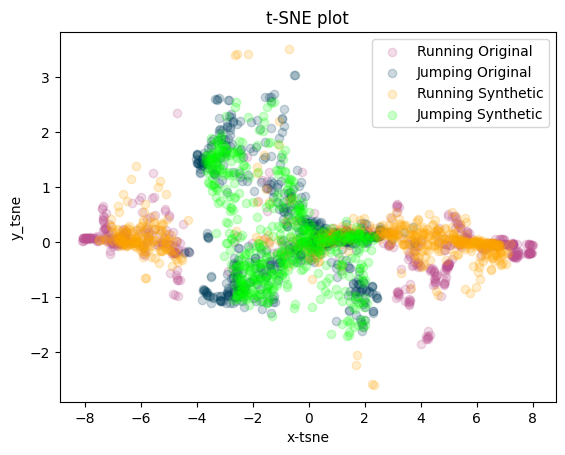

In [92]:
TSNE_visualization(real_running, real_jumping, syn_running, syn_jumping)

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.056s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.152151
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.407173
[t-SNE] KL divergence after 300 iterations: 2.752459
(2400, 2)


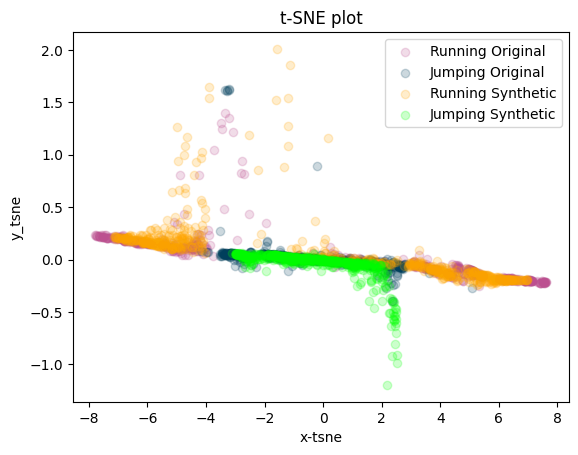

In [93]:
TSNE_visualization(real_running_sample, real_jumping_sample, syn_running_sample, syn_jumping_sample)

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.051s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.059547
[t-SNE] KL divergence after 150 iterations with early exaggeration: 74.526711
[t-SNE] KL divergence after 300 iterations: 2.047853
(2400, 2)


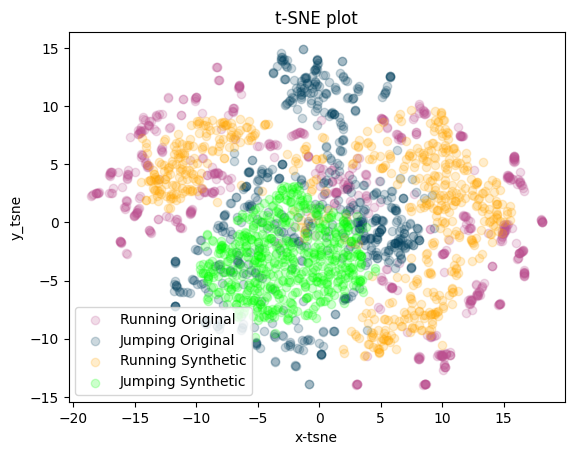

In [94]:
TSNE_visualization(real_running, real_jumping, train_running, train_jumping)

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.058s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 1.372108


[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.360275
[t-SNE] KL divergence after 300 iterations: 2.863545
(2400, 2)


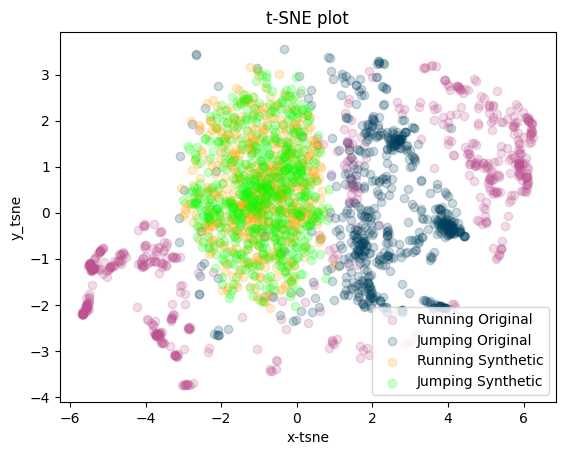

In [95]:
TSNE_visualization(real_running, real_jumping, baby_running, baby_jumping)

#### Frequency Domain

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 16.051308
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.179573
[t-SNE] KL divergence after 300 iterations: 1.885179
(2400, 2)


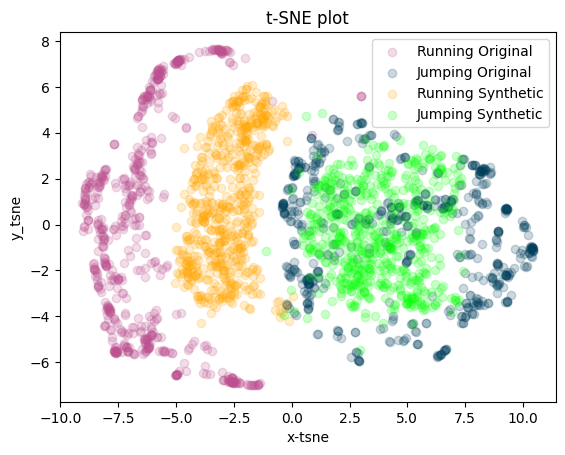

In [96]:
TSNE_visualization(np.abs(real_fft_running), np.abs(real_fft_jumping), np.abs(syn_fft_running), np.abs(syn_fft_jumping))

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.055s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 16.069461


[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.106796
[t-SNE] KL divergence after 300 iterations: 1.896797
(2400, 2)


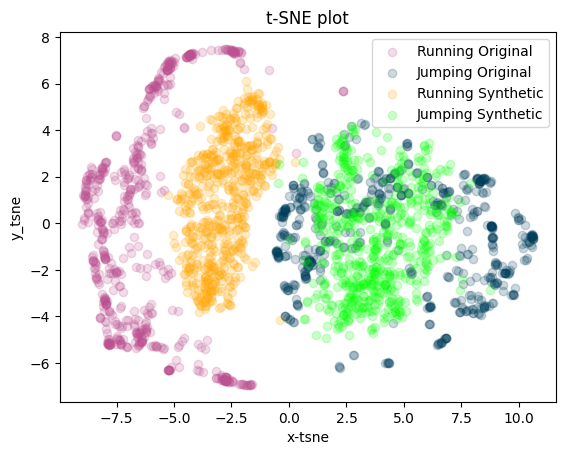

In [97]:
TSNE_visualization(np.abs(real_fft_running), np.abs(real_fft_jumping), np.abs(syn_fft_running_sample), np.abs(syn_fft_jumping_sample))

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.054s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 9.735646
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.640381
[t-SNE] KL divergence after 300 iterations: 2.246953
(2400, 2)


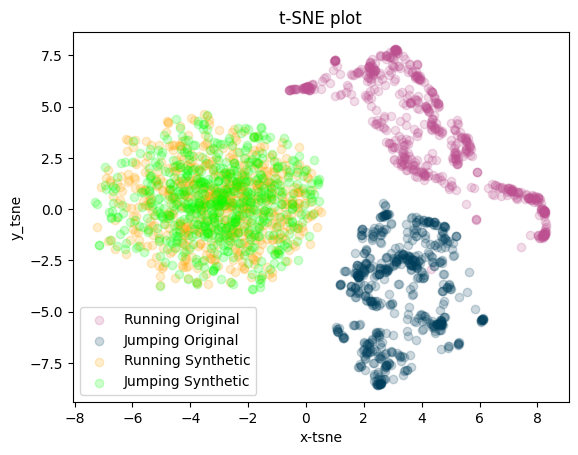

In [98]:
TSNE_visualization(np.abs(real_fft_running), np.abs(real_fft_jumping), np.abs(baby_fft_running), np.abs(baby_fft_jumping))

(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.174s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 15.380197
[t-SNE] KL divergence after 250 iterations with early exaggeration: 66.775963


[t-SNE] KL divergence after 300 iterations: 1.811292
(2400, 2)


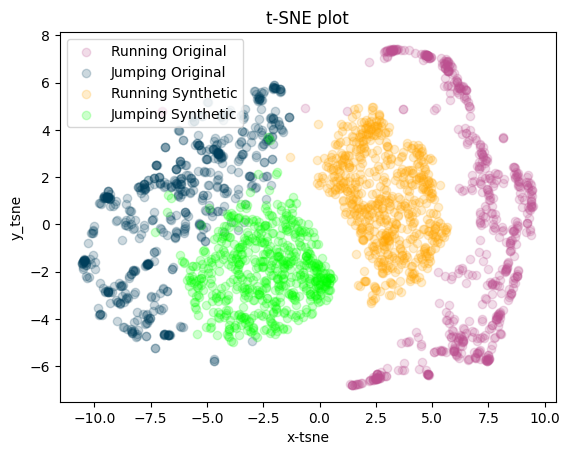

In [99]:
TSNE_visualization(np.abs(real_fft_running), np.abs(real_fft_jumping), np.abs(train_fft_running), np.abs(train_fft_jumping))

### 7 - Visualizing Model Training

In [100]:
def getModelsFromFolder(directory_path: str):
    temp = [os.path.join(directory_path, file) for file in os.listdir(directory_path)]
    return temp

In [101]:
# Specify the directory path
directory_jumping = '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model'
directory_running = '/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model'

jumping_file_paths = getModelsFromFolder(directory_jumping)
running_file_paths = getModelsFromFolder(directory_running)
jumping_file_paths, running_file_paths

(['/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/1_checkpoint',
  '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/4_checkpoint',
  '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/2_checkpoint',
  '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/checkpoint',
  '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/5_checkpoint',
  '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/3_checkpoint'],
 ['/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/1_checkpoint',
  '/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/4_checkpoint',
  '/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/2_checkpoint',
  '/workspaces/container-workspace/tts-gan-main

In [102]:
running_file_paths.sort()
running_file_paths

['/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/1_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/2_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/3_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/4_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/5_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Running_2024_10_02_16_00_30/Model/checkpoint']

In [103]:
jumping_file_paths.sort()
jumping_file_paths

['/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/1_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/2_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/3_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/4_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/5_checkpoint',
 '/workspaces/container-workspace/tts-gan-main/logs/Jumping_test1_2024_10_04_13_34_19/Model/checkpoint']

In [104]:
def trainingVisualization(original_running_data, original_jumping_data, running_model_paths, jumping_model_paths, f=False):
    '''







    '''
    titles = ['T0', 'T1', 'T2', 'T3', 'T4', 'T5']
    fig, axs = plt.subplots(1, len(running_model_paths), figsize=(25,8))
    #fig.suptitle('Time Comparison', fontsize=30)
    for i in range(len(running_model_paths)):
        synthetic_data =  Synthetic_Dataset(Jumping_model_path = jumping_model_paths[i],
                                            Running_model_path = running_model_paths[i],
                                            sample_size=600) 
        
        synthetic_DataLoader = data.DataLoader(synthetic_data, batch_size=1, num_workers=1, shuffle=True)
        synthetic_jumping, synthetic_running = running_jumping_split(synthetic_DataLoader)
        synthetic_jumping = synthetic_jumping.transpose(0, 2, 1)
        synthetic_running = synthetic_running.transpose(0, 2, 1)

        print(synthetic_jumping.shape, synthetic_running.shape)
        
        if f:
            synthetic_running = np.abs(fft.fft(torch.from_numpy(synthetic_running), dim=-1))
            synthetic_jumping = np.abs(fft.fft(torch.from_numpy(synthetic_jumping), dim=-1)) 
            original_running_data = np.abs(original_running_data)
            original_jumping_data = np.abs(original_jumping_data)


        tsne_results = TSNE_visualization(original_running_data, original_jumping_data,
                                          synthetic_running, synthetic_jumping, show=False)
        
        axs[i].scatter(tsne_results[:600,0], tsne_results[:600,1], 
                        c = '#bc5090', alpha = 0.2, label = "Running Original")
        axs[i].scatter(tsne_results[600:1200,0], tsne_results[600:1200,1], 
                        c = '#003f5c', alpha = 0.2, label = "Jumping Original")
        axs[i].scatter(tsne_results[1200:1800,0], tsne_results[1200:1800,1], 
                        c = '#ffa600', alpha = 0.2, label = "Running Synthetic")
        axs[i].scatter(tsne_results[1800:,0], tsne_results[1800:,1], 
                        c = '#00ff00', alpha = 0.2, label = "Jumping Synthetic")
        axs[i].legend()   
        axs[i].set_title(titles[i], fontsize=20)    
    

/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

All epochs are 0


(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.151s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 1.383660
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.342056
[t-SNE] KL divergence after 300 iterations: 2.832748
(2400, 2)
All epochs are 0


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.029470
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.361176
[t-SNE] KL divergence after 300 iterations: 2.814365
(2400, 2)
All epochs are 0


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.145s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.151846
[t-SNE] KL divergence after 200 iterations with early exaggeration: 74.542252
[t-SNE] KL divergence after 300 iterations: 2.223511
(2400, 2)
All epochs are 0


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.138s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.091369
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.734764
[t-SNE] KL divergence after 300 iterations: 2.650584
(2400, 2)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

All epochs are 0
(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.099871
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.775803
[t-SNE] KL divergence after 300 iterations: 2.493751
(2400, 2)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

Running checkpoint: 506
Jumping checkpoint: 834
(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.053112
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.614372
[t-SNE] KL divergence after 300 iterations: 2.540846
(2400, 2)


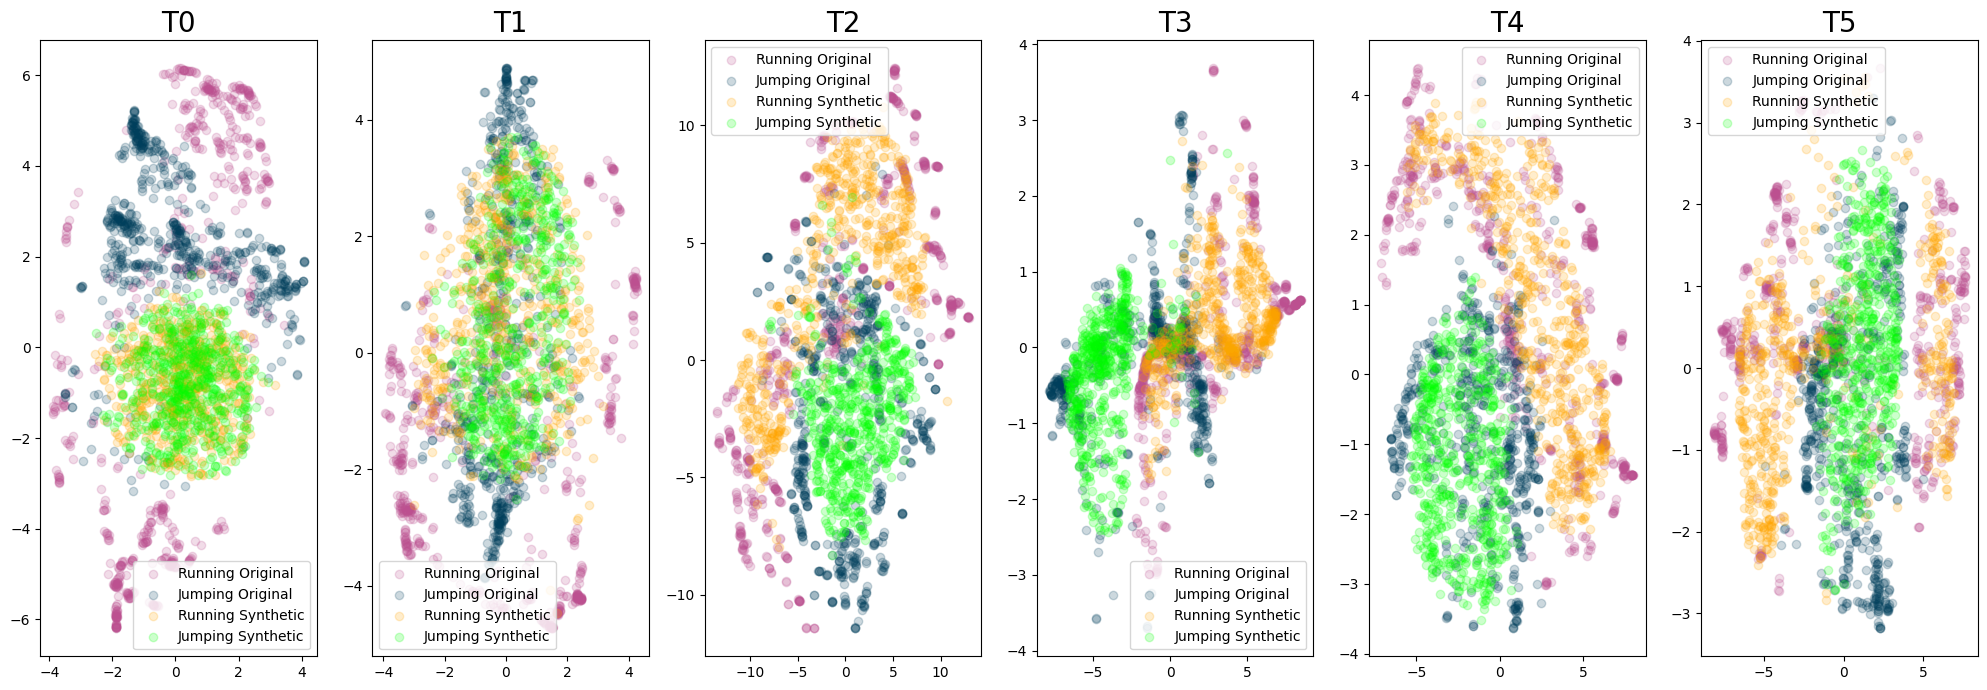

In [105]:
trainingVisualization(real_running, real_jumping, running_file_paths, jumping_file_paths)

/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

All epochs are 0
(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.150s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 1.814573
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.530762
[t-SNE] KL divergence after 300 iterations: 2.300696
(2400, 2)
All epochs are 0


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.143s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.630030
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.312958
[t-SNE] KL divergence after 300 iterations: 1.985425
(2400, 2)
All epochs are 0


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.139s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 2.975972
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.397255
[t-SNE] KL divergence after 300 iterations: 1.795828
(2400, 2)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

All epochs are 0
(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.141s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 3.167790
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.685001
[t-SNE] KL divergence after 300 iterations: 1.795889
(2400, 2)
All epochs are 0


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.142s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 3.213239
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.244534
[t-SNE] KL divergence after 300 iterations: 1.817548
(2400, 2)


/workspaces/container-workspace/tts-gan/LoadSyntheticRunningJumping.py:21: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  running_ckp = torch.load(Running_model_path, map_loc

Running checkpoint: 506
Jumping checkpoint: 834
(1200, 3, 1, 150)
(1200, 1)
(600, 150, 3) (600, 150, 3)
(2400, 150)
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2400 samples in 0.000s...
[t-SNE] Computed neighbors for 2400 samples in 0.152s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2400
[t-SNE] Computed conditional probabilities for sample 2000 / 2400
[t-SNE] Computed conditional probabilities for sample 2400 / 2400
[t-SNE] Mean sigma: 3.290321
[t-SNE] KL divergence after 250 iterations with early exaggeration: 60.012054
[t-SNE] KL divergence after 300 iterations: 1.801601
(2400, 2)


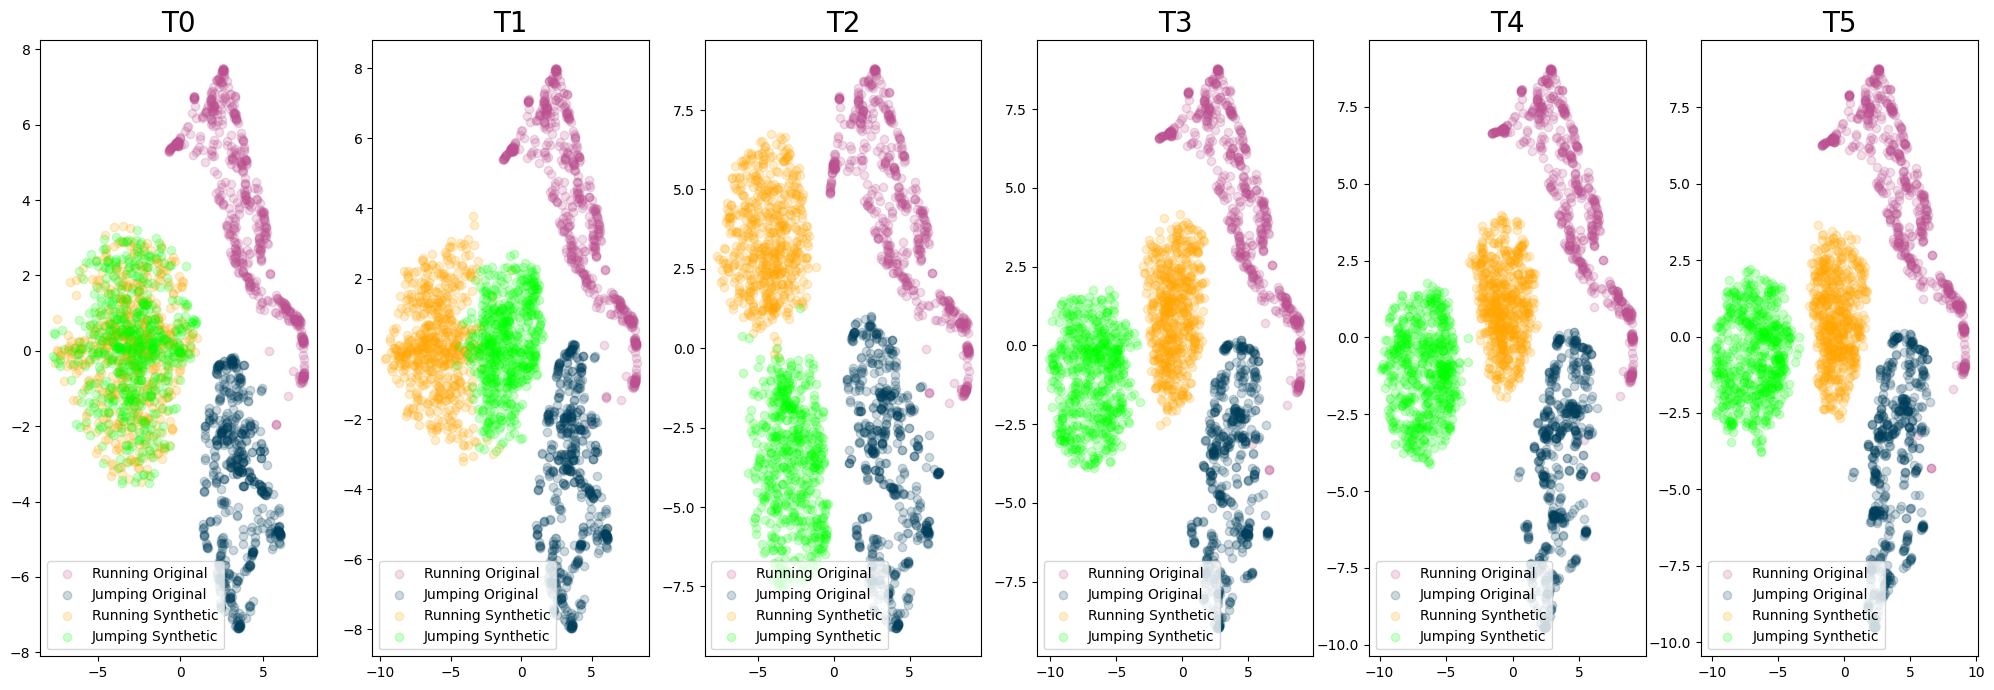

In [106]:
trainingVisualization(real_fft_running, real_fft_jumping, running_file_paths, jumping_file_paths, f=True)